# Exploratory Data Analysis

In [2]:
import pandas as pd  # To work with dataset
import numpy as np  # To do numerical operations
import matplotlib.pyplot as plt  # Basic visualization
import seaborn as sns  # Advanced visualization
from scipy import stats  # Statistical analysis
from sklearn.decomposition import PCA  # Dimensionality reduction
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("D://Downloads//Yasin_Bondora_preprocessed - Yasin_Bondora_preprocessed.csv.csv")

In [4]:
df.head()

BidsPortfolioManager  BidsApi  BidsManual  \
0                  1355        0         645   
1                  1000        0           0   
2                  2345        0         655   
3                  2045        0         955   
4                  1500        0           0   

                     NewCreditCustomer              VerificationType  \
0              No_prior_credit_history               Income verified   
1  at_least_3_months_of_credit_history  Income_and_expenses_verified   
2  at_least_3_months_of_credit_history               Income verified   
3              No_prior_credit_history               Income verified   
4              No_prior_credit_history             Income_unverified   

  LanguageCode  Age Gender Country  AppliedAmount  ...  PrincipalBalance  \
0      Finnish   28   Male      FI           2000  ...            612.43   
1     Estonian   27   Male      EE           1000  ...            391.95   
2     Estonian   29   Male      EE           3000  ...           1729.58   
3      Finnish   25   Male      FI           3000  ...           1083.28   
4     Estonian   30   Male      EE           1500  ...             46.89   

   InterestAndPenaltyBalance  NoOfPreviousLoansBeforeLoan  \
0                        0.0                            0   
1                        0.0                            1   
2                        0.0                            1   
3                        0.0                            0   
4                        0.0                            0   

   AmountOfPreviousLoansBeforeLoan PreviousRepaymentsBeforeLoan  \
0                              0.0                         0.00   
1                           1300.0                       187.87   
2                           1000.0                       623.89   
3                              0.0                         0.00   
4                              0.0                         0.00   

  PreviousEarlyRepaymentsBefoleLoan PreviousEarlyRepaymentsCountBeforeLoan  \
0                               0.0                                      0   
1                               0.0                                      0   
2                               0.0                                      0   
3                               0.0                                      0   
4                               0.0                                      0   

  PrincipalDebtServicingCost InterestAndPenaltyDebtServicingCost defaulted  
0                        0.0                                0.00         0  
1                        0.0                                4.86         0  
2                        0.0                                0.00         0  
3                        0.0                                0.00         0  
4                        0.0                                0.00         0  

[5 rows x 48 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12707 entries, 0 to 12706
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    12707 non-null  int64  
 1   BidsApi                                 12707 non-null  int64  
 2   BidsManual                              12707 non-null  int64  
 3   NewCreditCustomer                       12707 non-null  object 
 4   VerificationType                        12707 non-null  object 
 5   LanguageCode                            12707 non-null  object 
 6   Age                                     12707 non-null  int64  
 7   Gender                                  12707 non-null  object 
 8   Country                                 12707 non-null  object 
 9   AppliedAmount                           12707 non-null  int64  
 10  Amount                                  12707 non-null  in

In [6]:
df.isnull().sum()

BidsPortfolioManager                         0
BidsApi                                      0
BidsManual                                   0
NewCreditCustomer                            0
VerificationType                             0
LanguageCode                                 0
Age                                          0
Gender                                       0
Country                                      0
AppliedAmount                                0
Amount                                       0
Interest                                     0
LoanDuration                                 0
MonthlyPayment                              33
County                                    1379
City                                       389
UseOfLoan                                    0
Education                                    0
MaritalStatus                                0
EmploymentStatus                             0
EmploymentDurationCurrentEmployer            1
OccupationAre

In [7]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent[missing_percent > 50]

Series([], dtype: float64)

In [8]:
Numerical_Columns = df.select_dtypes(include=['number']).columns
print(Numerical_Columns)

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'PlannedPrincipalTillDate', 'RecoveryStage', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalWriteOffs',
       'InterestAndPenaltyWriteOffs', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsBefoleLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'PrincipalDebtServicingCost',
       'InterestAndPenaltyDebtServicingCost', 'defaulted'],
      dtype='object')


In [9]:
Categorical_Columns = df.select_dtypes(include=['object']).columns
Categorical_Columns

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
       'Country', 'County', 'City', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'OccupationArea', 'HomeOwnershipType', 'Rating', 'Restructured'],
      dtype='object')

In [10]:
# Filling the null valves in Categorical columns with mode
for col in Categorical_Columns: 
    df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
for col in Numerical_Columns:  # Filling the null values in Numeric columns with mean
        df[col].fillna(df[col].mean(), inplace=True)

In [12]:
df.isnull().sum()

BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
NewCreditCustomer                         0
VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
Country                                   0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
County                                    0
City                                      0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
EmploymentDurationCurrentEmployer         0
OccupationArea                            0
HomeOwnershipType               

In [69]:
df[Numerical_Columns].describe().T

count         mean          std  \
BidsPortfolioManager                    12707.0  1366.253482  1495.713045   
BidsApi                                 12707.0    44.845203   169.251521   
BidsManual                              12707.0   576.362871   844.463790   
Age                                     12707.0    42.636893    11.942061   
AppliedAmount                           12707.0  2586.403164  2457.549045   
Amount                                  12707.0  2308.622255  2113.327283   
Interest                                12707.0    23.231591    12.819226   
LoanDuration                            12707.0    47.613048    12.451266   
MonthlyPayment                          12674.0    93.657632    90.959516   
IncomeTotal                             12707.0  1393.465307  2849.645881   
ExistingLiabilities                     12707.0     4.193988     3.507416   
LiabilitiesTotal                        12707.0   500.518812   665.040667   
RefinanceLiabilities                    12707.0     0.134808     0.733927   
DebtToIncome                            12707.0     8.715958    17.660365   
FreeCash                                12707.0    97.182741   774.777197   
MonthlyPaymentDay                       12707.0    12.545447     6.556013   
PlannedPrincipalTillDate                 7651.0   302.707599   495.245750   
RecoveryStage                            8141.0     1.001597     0.039931   
PrincipalPaymentsMade                   12707.0   860.200342  1015.733758   
InterestAndPenaltyPaymentsMade          12707.0  1008.830843  1230.020306   
PrincipalWriteOffs                       8477.0     0.000000     0.000000   
InterestAndPenaltyWriteOffs              8477.0     0.000000     0.000000   
PrincipalBalance                        12707.0  1448.420151  1553.214920   
InterestAndPenaltyBalance               12707.0     4.265981    33.177925   
NoOfPreviousLoansBeforeLoan             12707.0     2.187141     2.372732   
AmountOfPreviousLoansBeforeLoan         12707.0  4195.400438  4646.303459   
PreviousRepaymentsBeforeLoan             9465.0  1729.257272  2980.522483   
PreviousEarlyRepaymentsBefoleLoan        8540.0   320.961124  1250.838566   
PreviousEarlyRepaymentsCountBeforeLoan  12707.0     0.118360     0.451312   
PrincipalDebtServicingCost               8477.0     0.002642     0.133929   
InterestAndPenaltyDebtServicingCost      8477.0     1.086999    20.158284   
defaulted                               12707.0     0.005824     0.076093   

                                           min      25%      50%        75%  \
BidsPortfolioManager                      0.00  414.000   849.00  1765.5000   
BidsApi                                   0.00    0.000     3.00    20.0000   
BidsManual                                0.00   14.000   275.00   775.0000   
Age                                      18.00   33.000    42.00    51.0000   
AppliedAmount                           500.00  530.000  1800.00  3295.0000   
Amount                                  260.00  530.000  1590.00  3185.0000   
Interest                                  7.95   14.440    20.10    29.2300   
LoanDuration                              3.00   36.000    48.00    60.0000   
MonthlyPayment                            0.00   24.130    61.91   129.0375   
IncomeTotal                               0.00  735.000  1050.00  1600.0000   
ExistingLiabilities                       0.00    2.000     3.00     6.0000   
LiabilitiesTotal                          0.00  155.865   370.00   646.3400   
RefinanceLiabilities                      0.00    0.000     0.00     0.0000   
DebtToIncome                              0.00    0.000     0.00     0.0000   
FreeCash                                -26.48    0.000     0.00     0.0000   
MonthlyPaymentDay                         0.00    8.000    12.00    15.0000   
PlannedPrincipalTillDate                  0.00   32.925   105.52   364.2650   
RecoveryStage                             1.00    1.000     1.00     1.0000   

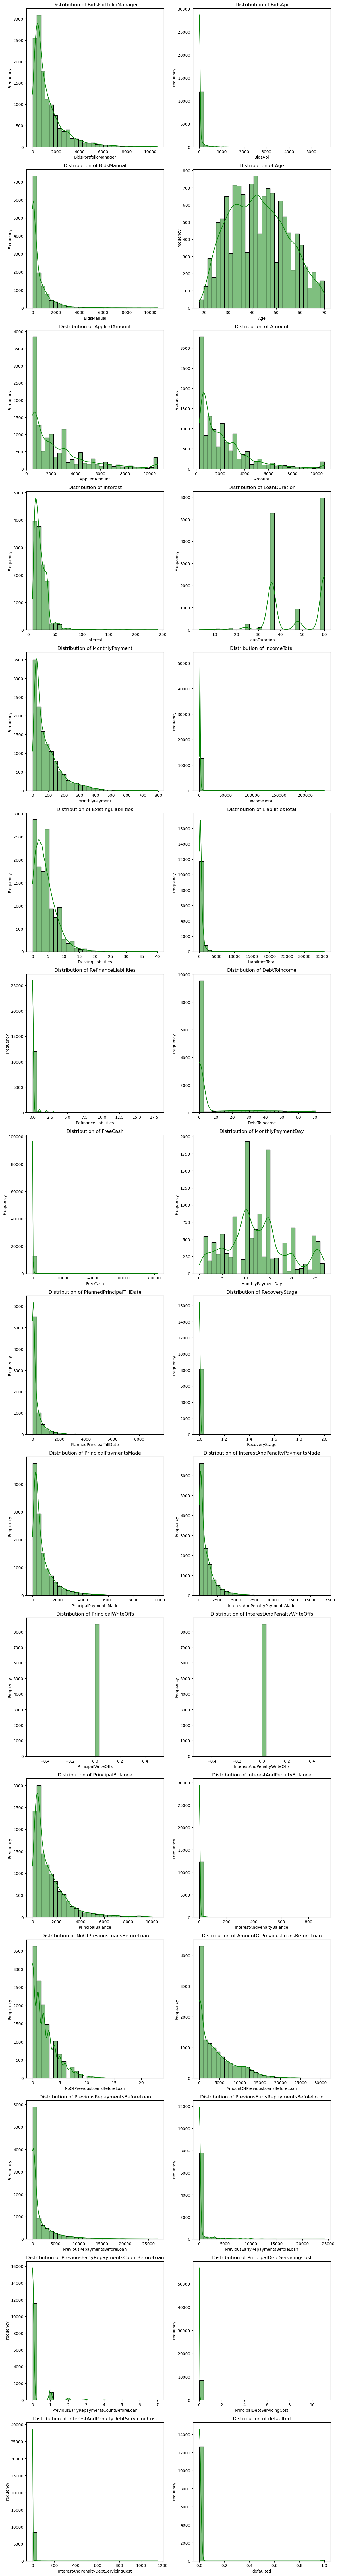

In [71]:
# Set figure size
plt.figure(figsize=(12, len(Numerical_Columns) * 3)) # Adjust figure size dynamically

# Loop through all numeric columns and plot histograms
for i, col in enumerate(Numerical_Columns):
    plt.subplot(len(Numerical_Columns) // 2 + 1, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

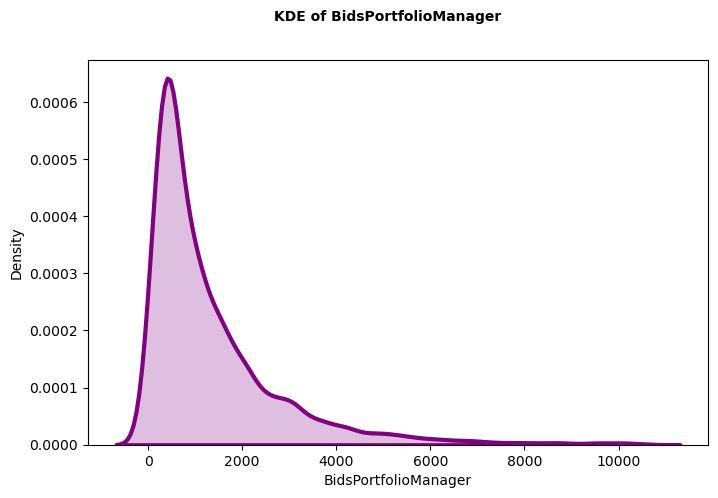

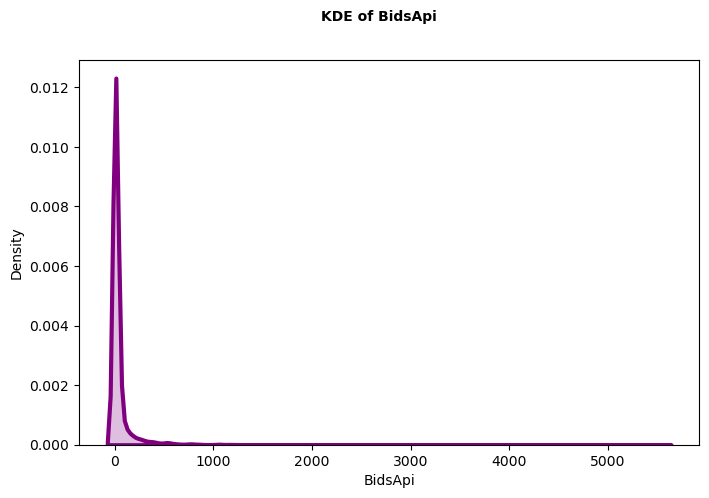

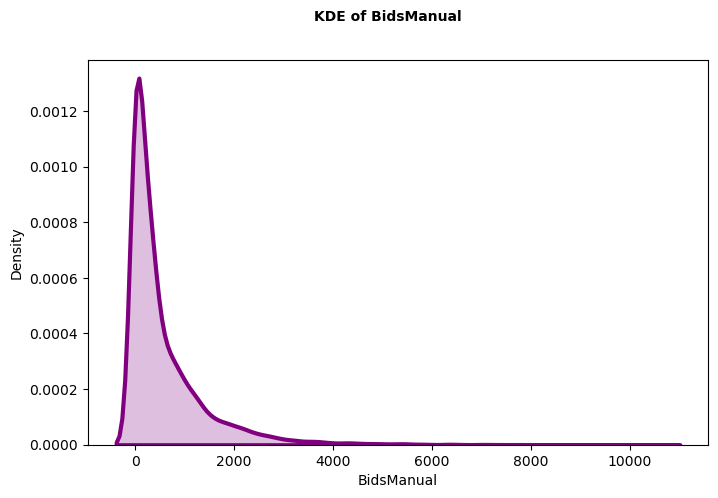

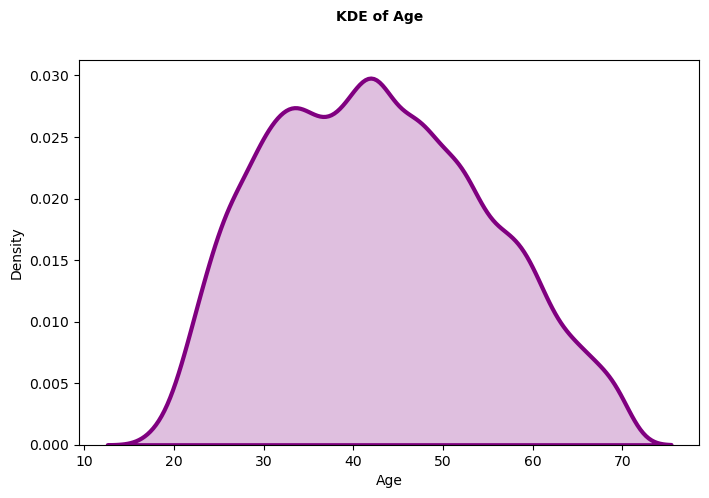

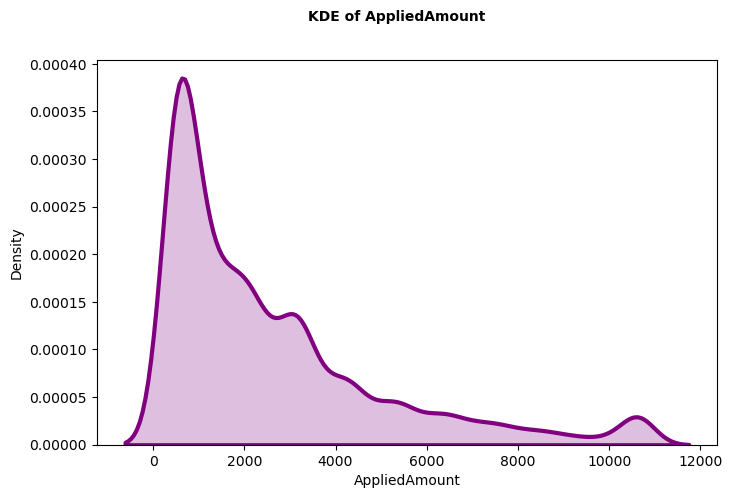

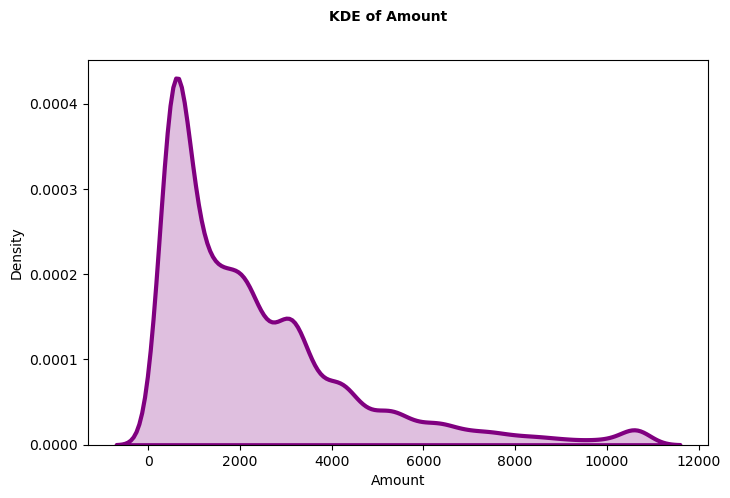

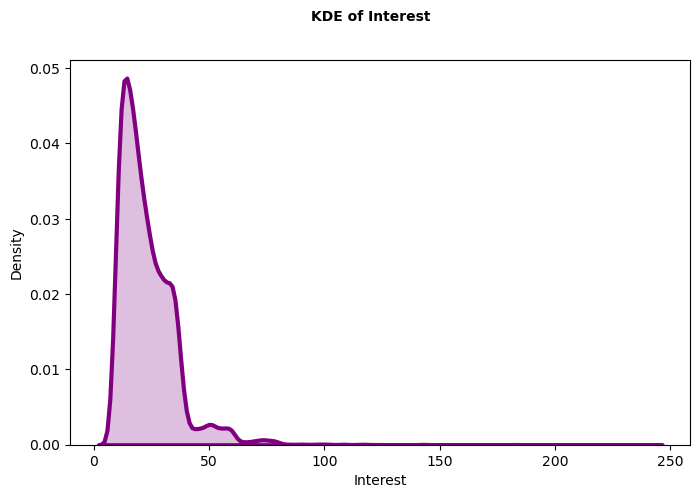

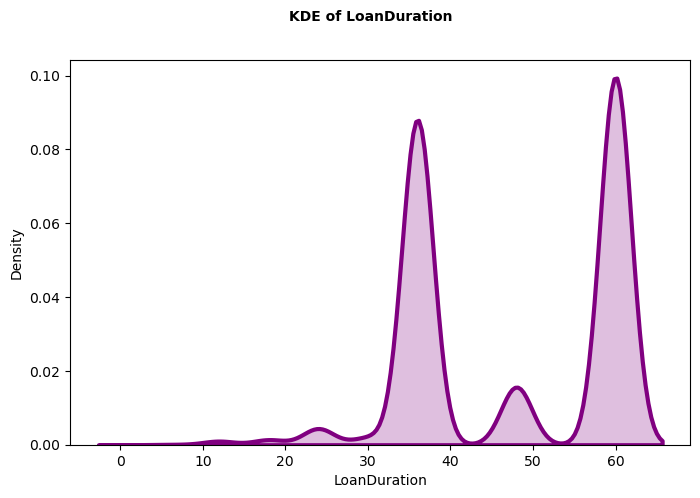

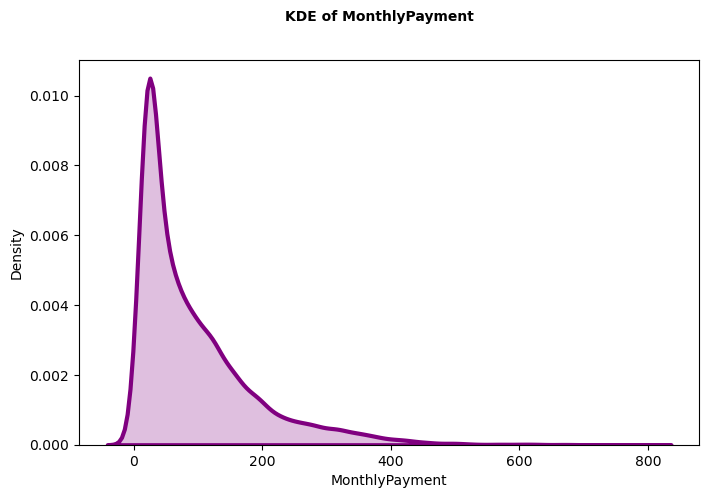

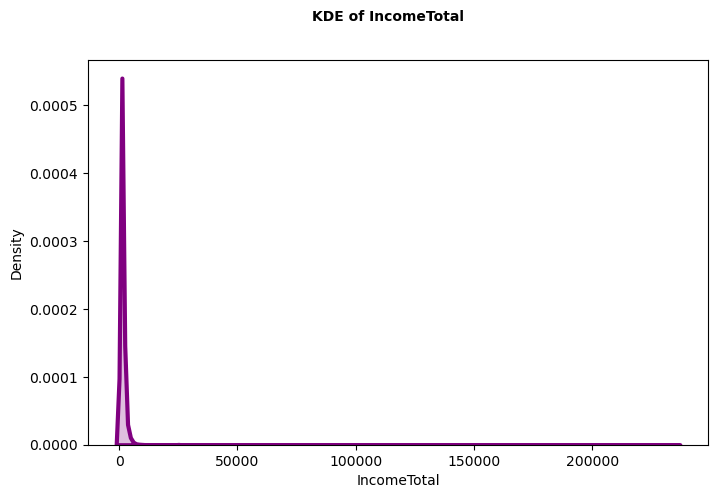

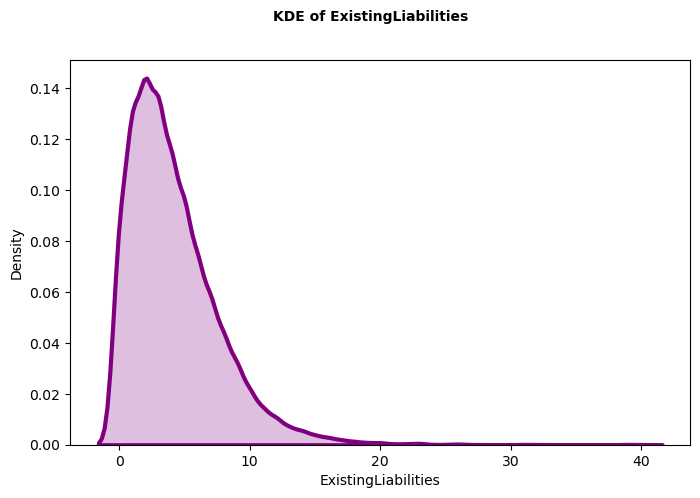

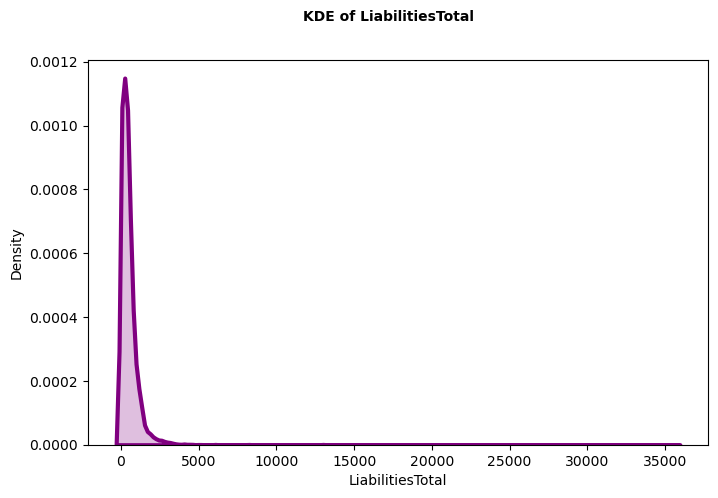

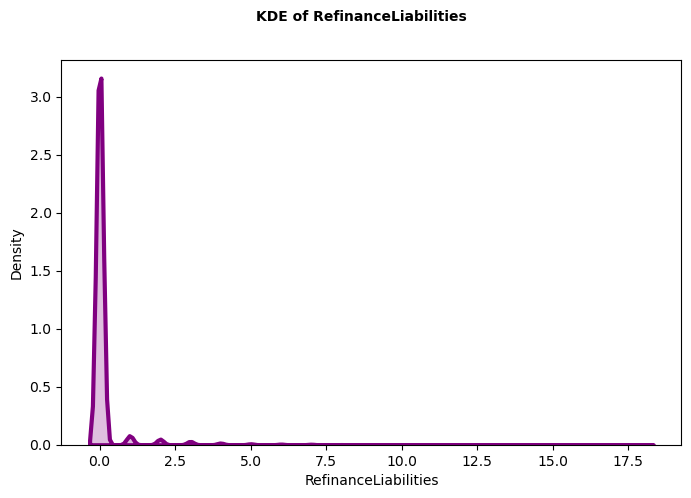

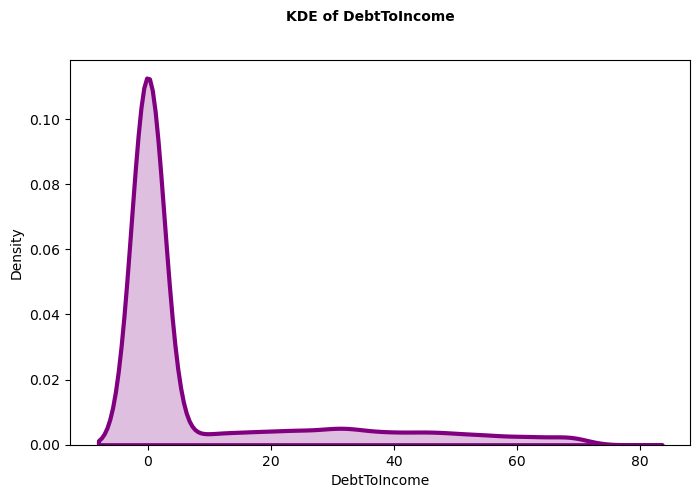

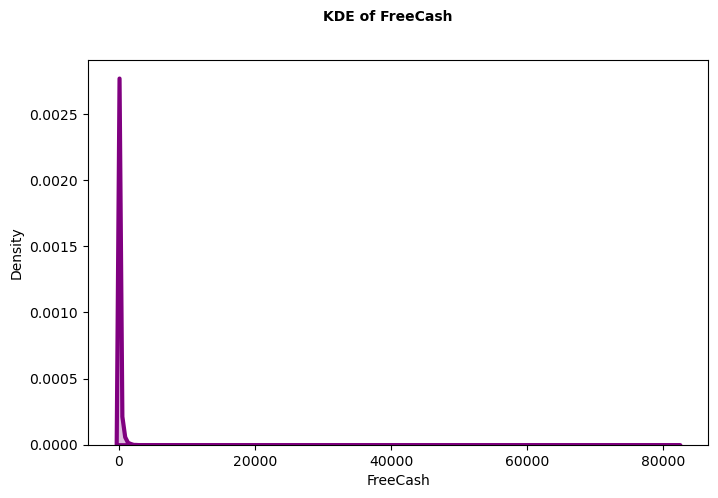

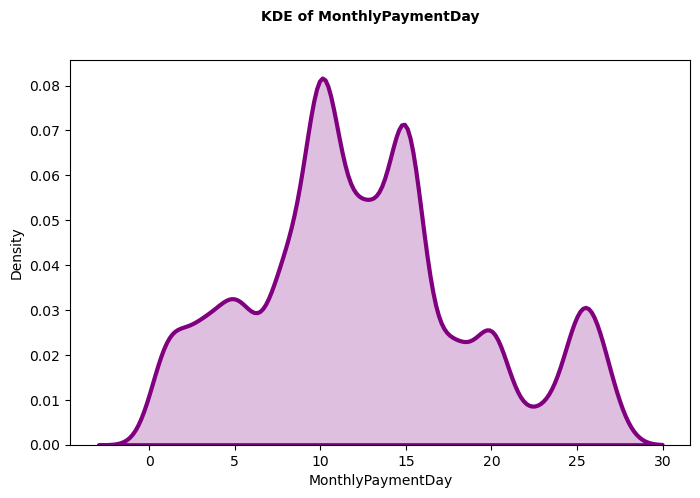

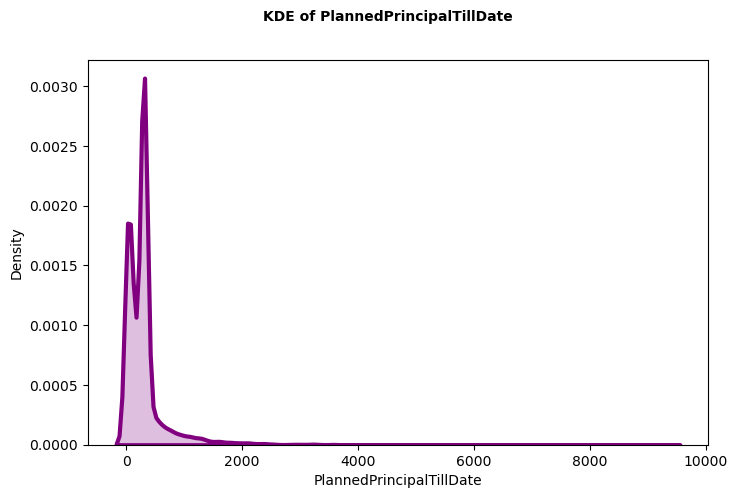

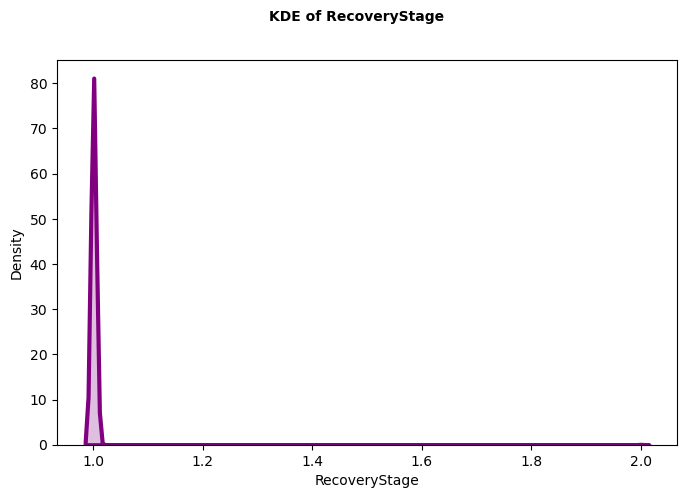

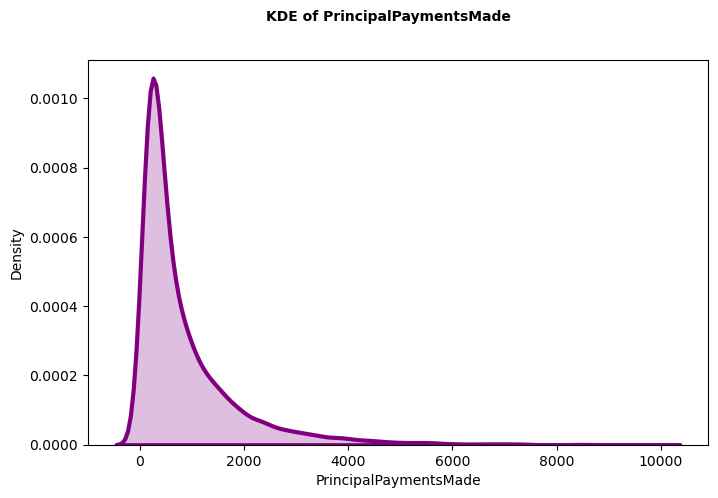

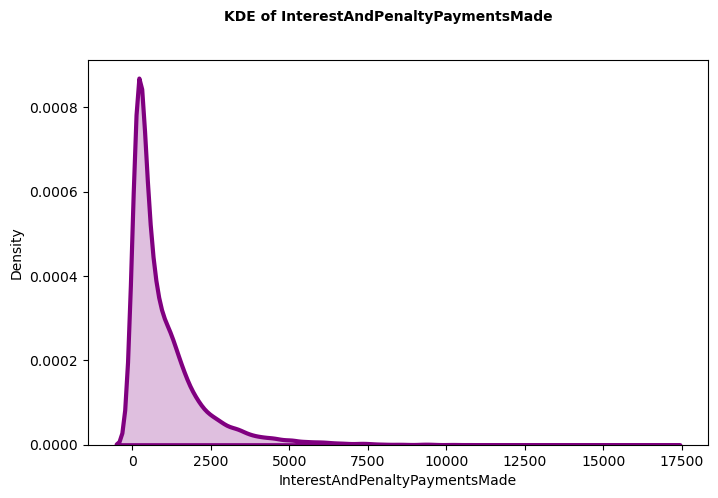

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17164\602195824.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[Numerical_Columns][col], fill=True, color='purple', linewidth=3)


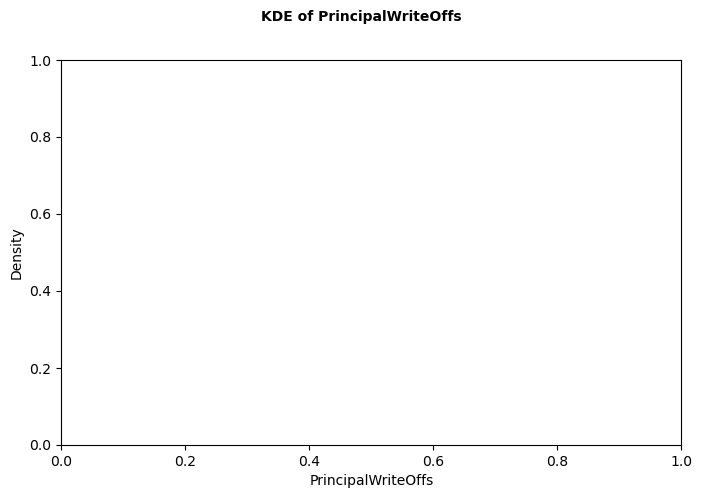

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17164\602195824.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[Numerical_Columns][col], fill=True, color='purple', linewidth=3)


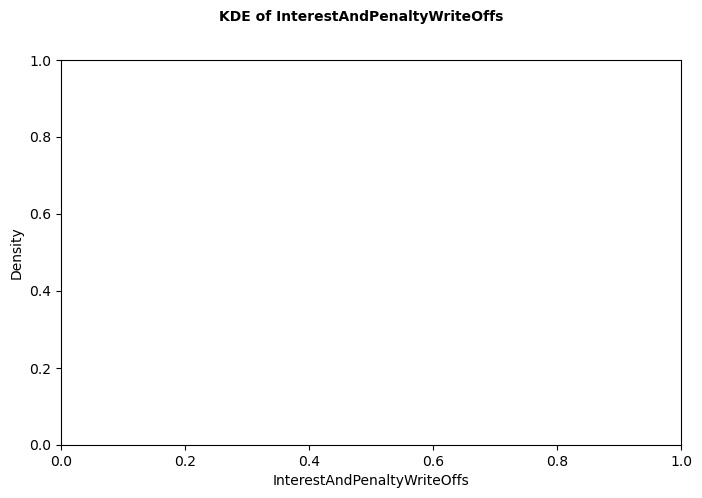

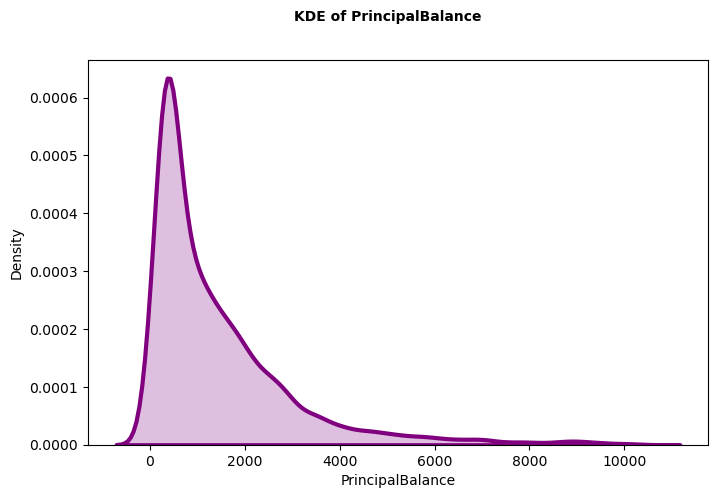

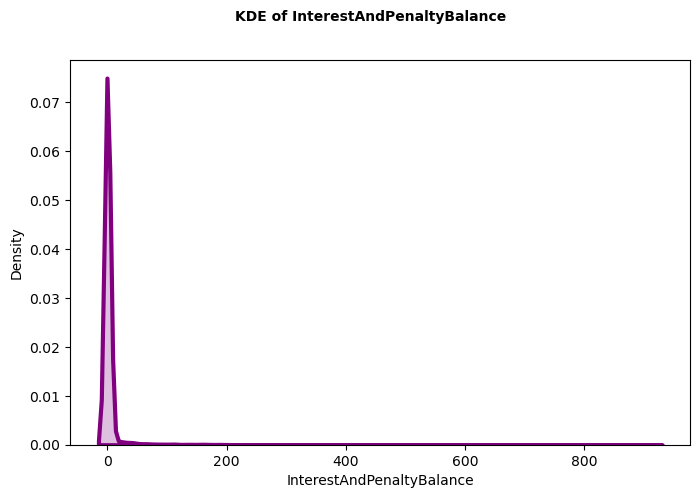

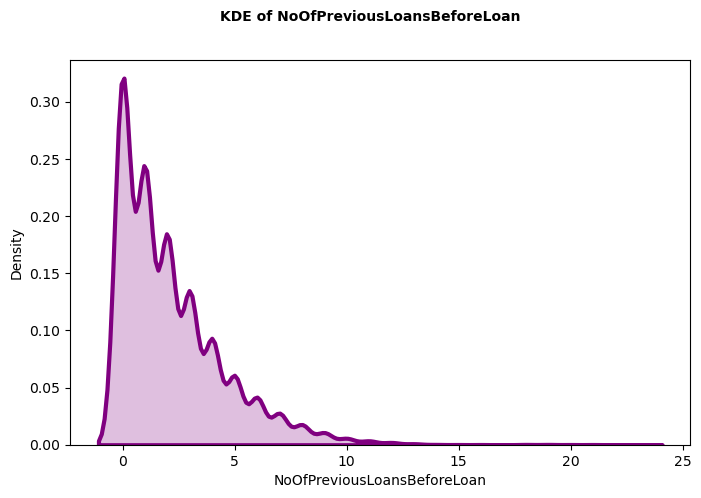

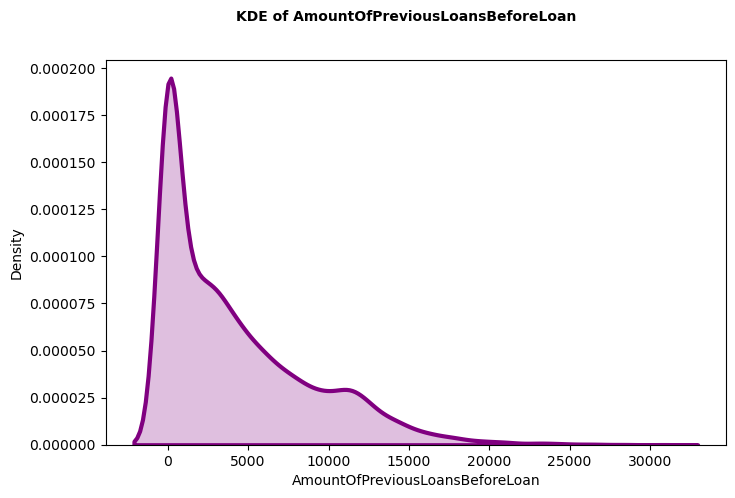

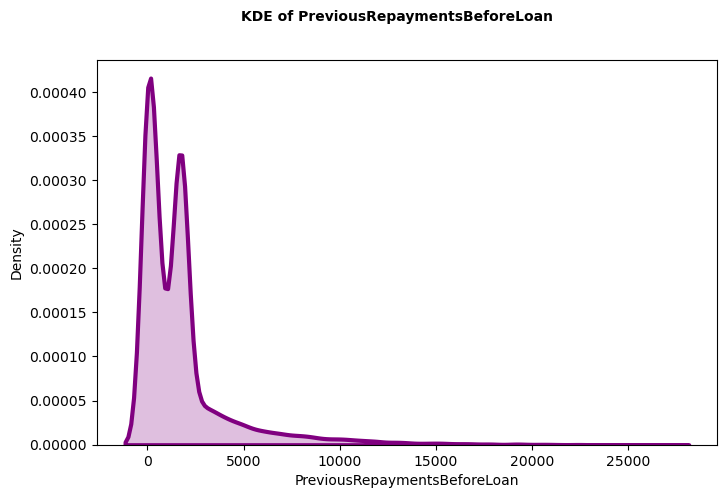

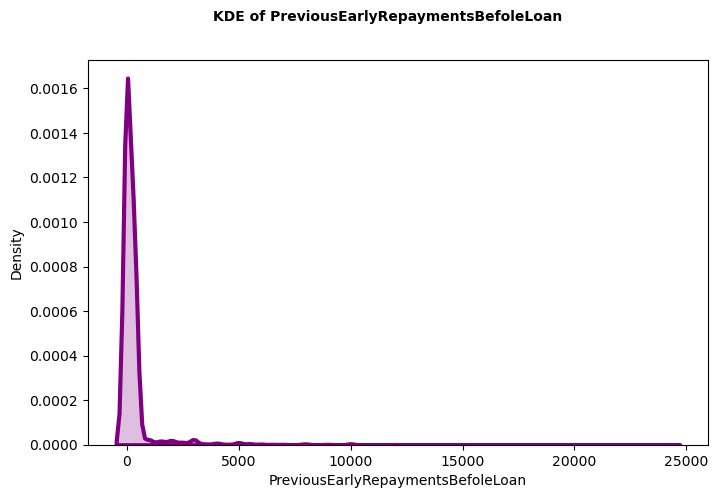

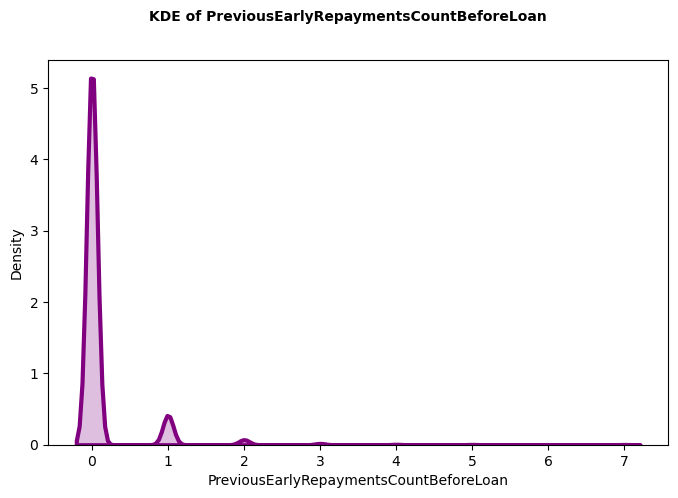

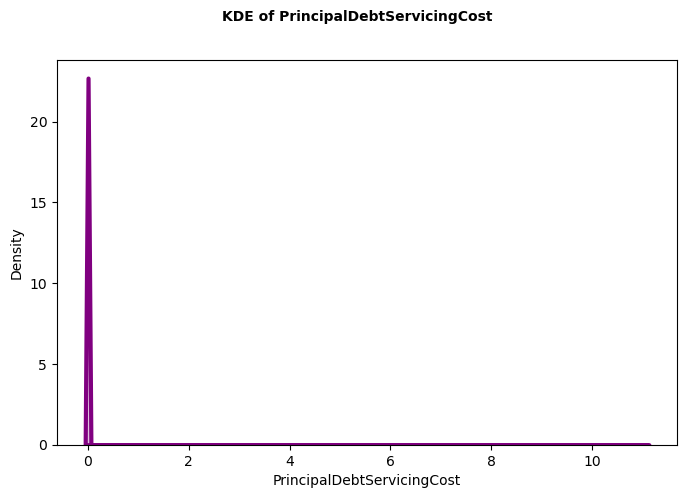

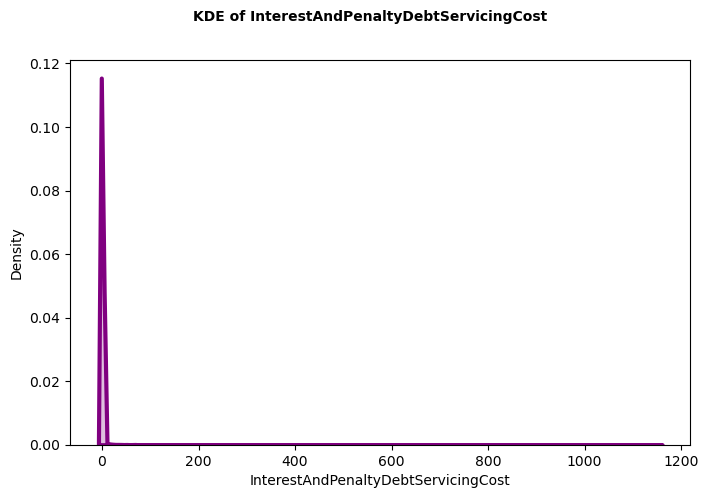

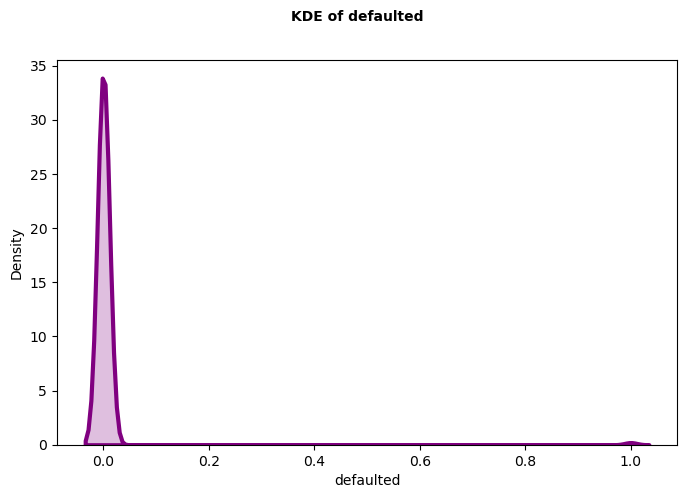

In [15]:
for col in df[Numerical_Columns].columns:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[Numerical_Columns][col], fill=True, color='purple', linewidth=3)
    plt.suptitle(f"KDE of {col}", fontsize=10,fontweight='bold')
    plt.show()

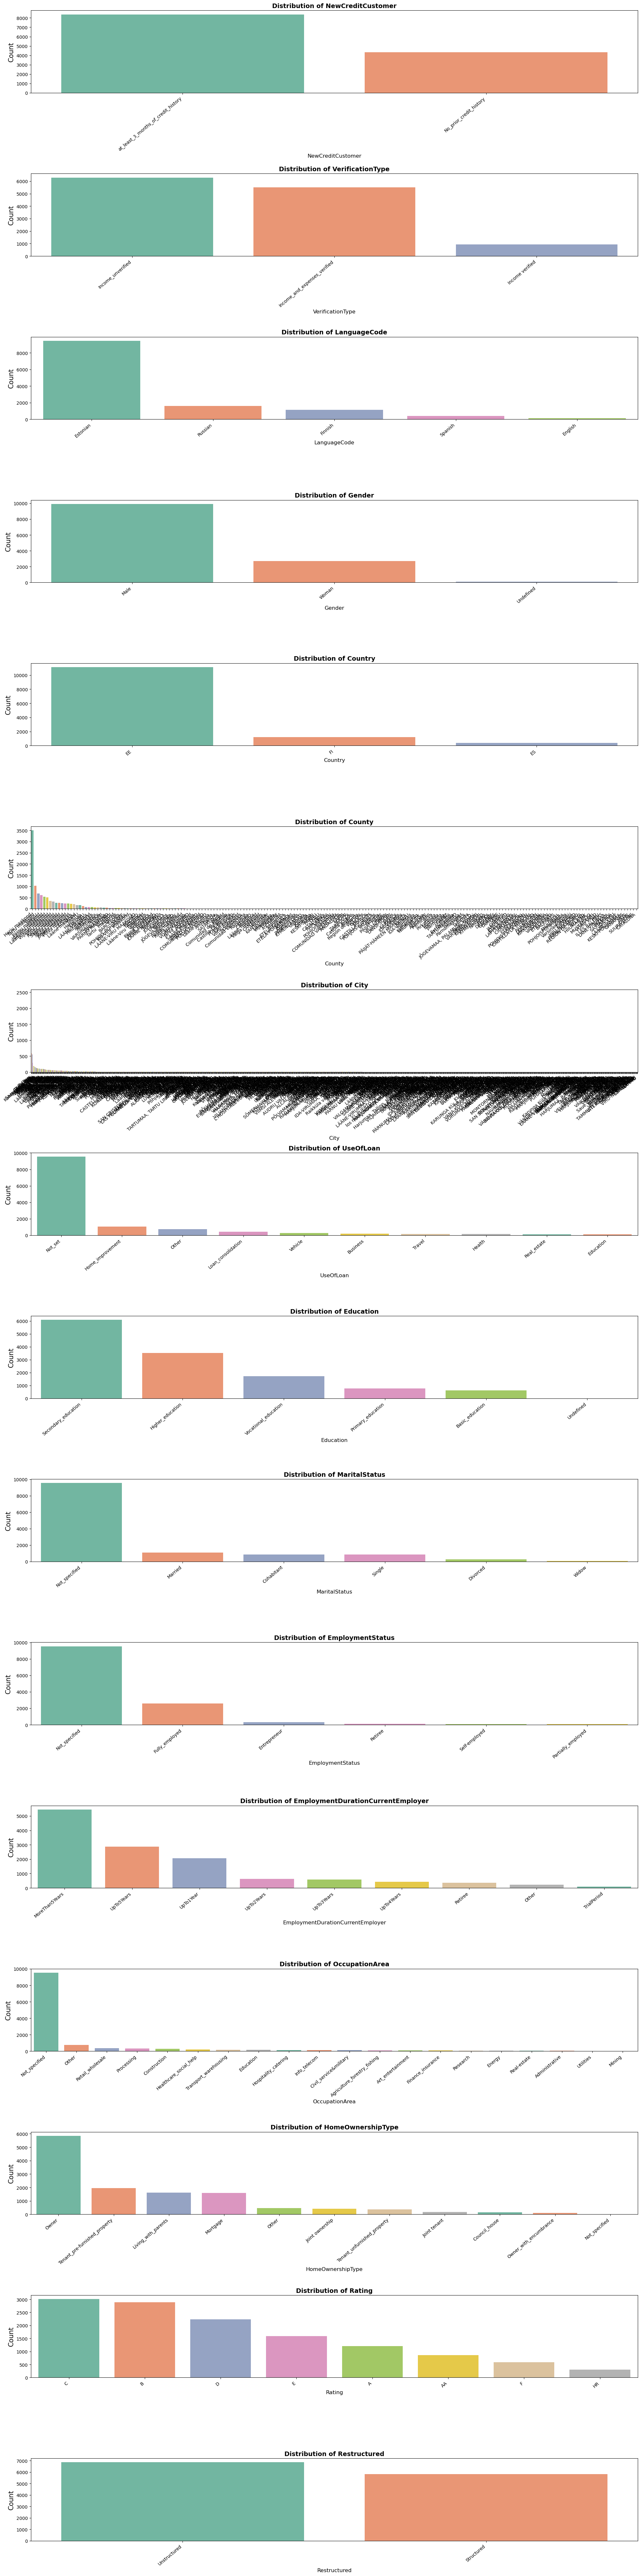

In [74]:
# Set figure siz
fig, axes = plt.subplots(nrows=len(Categorical_Columns), ncols=1, figsize=(20, 5 * len(Categorical_Columns)))

for ax, col in zip(axes, Categorical_Columns):
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, ax=ax, palette='Set2')
    ax.set_title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

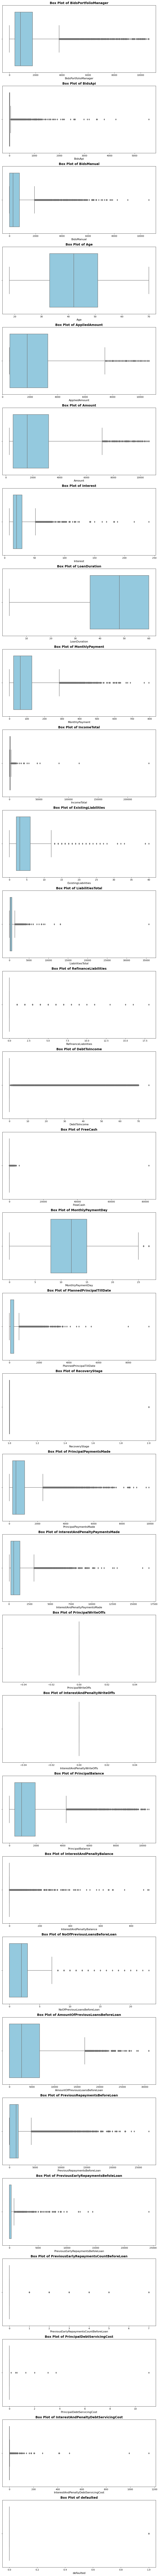

In [17]:
fig, axes = plt.subplots(nrows=len(Numerical_Columns), ncols=1, figsize=(10, 5 * len(Numerical_Columns)))

# Loop through numerical columns and plot box plots
for ax, col in zip(axes, Numerical_Columns):
    sns.boxplot(x=df[col], ax=ax, color='skyblue')

    # Customize the plot
    ax.set_title(f"Box Plot of {col}", fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()



# Univariate Data Analysis

In [18]:
Numerical_Columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'PlannedPrincipalTillDate', 'RecoveryStage', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalWriteOffs',
       'InterestAndPenaltyWriteOffs', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsBefoleLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'PrincipalDebtServicingCost',
       'InterestAndPenaltyDebtServicingCost', 'defaulted'],
      dtype='object')

In [19]:
Numeric_Features=['Age', 'Amount', 'Interest', 'LoanDuration',             
    'MonthlyPayment', 'IncomeTotal', 'ExistingLiabilities', 
    'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 
    'FreeCash', 'MonthlyPaymentDay', 'PlannedPrincipalTillDate',
    'RecoveryStage', 'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',        
    'PrincipalBalance', 'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
    'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
    'PreviousEarlyRepaymentsBefoleLoan', 'PreviousEarlyRepaymentsCountBeforeLoan', 'defaulted']

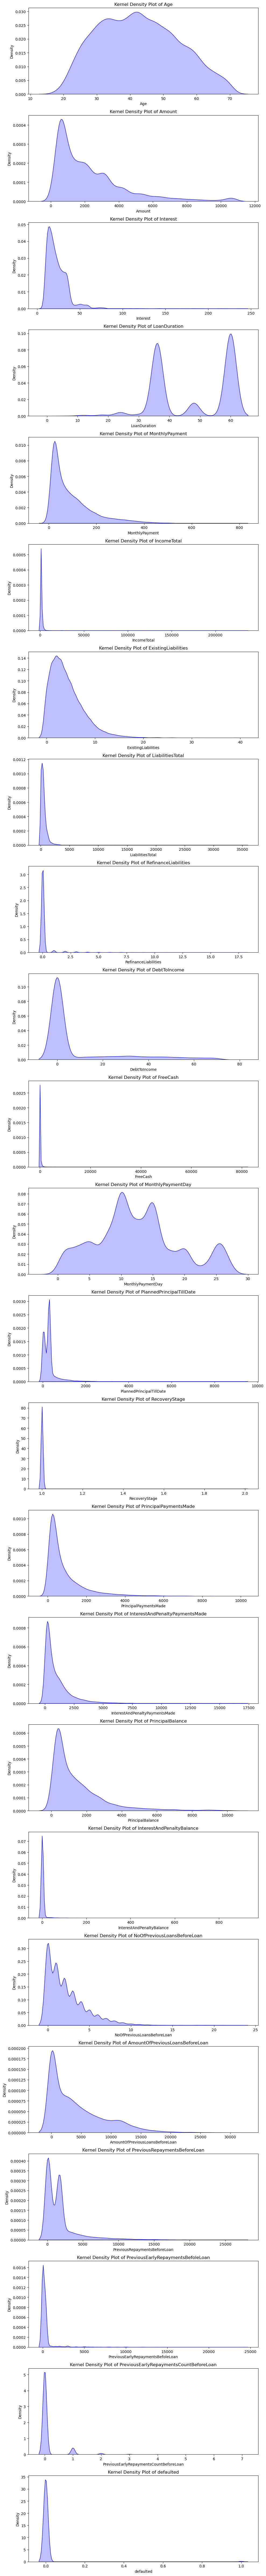

In [20]:
fig, axes = plt.subplots(nrows=len(Numeric_Features), ncols=1, figsize=(10, 4 * len(Numeric_Features)))
for ax, col in zip(axes, Numeric_Features):
    sns.kdeplot(df[col], fill=True, color='blue', ax=ax)
    ax.set_title(f"Kernel Density Plot of {col}")

plt.tight_layout()
plt.show()

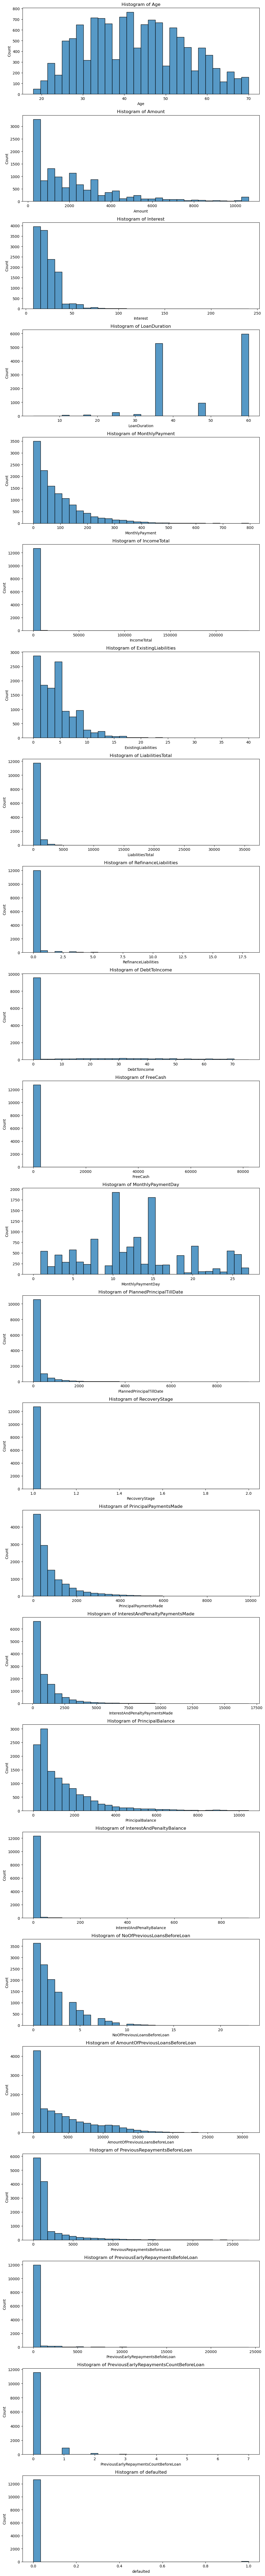

In [21]:
fig, axes = plt.subplots(nrows=len(Numeric_Features), ncols=1, figsize=(10, 4 * len(Numeric_Features)))

if len(Numeric_Features) == 1:
    axes = [axes]

for ax, col in zip(axes, Numeric_Features):
    sns.histplot(df[col], bins=30, kde=False, ax=ax, edgecolor='black')
    ax.set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

In [23]:
summary_stats = df[Numeric_Features].describe().T 
summary_stats['median'] = df[Numeric_Features].median()
summary_stats['range'] = summary_stats['max'] - summary_stats['min']
summary_stats

count         mean          std  \
Age                                     12707.0    42.636893    11.942061   
Amount                                  12707.0  2308.622255  2113.327283   
Interest                                12707.0    23.231591    12.819226   
LoanDuration                            12707.0    47.613048    12.451266   
MonthlyPayment                          12707.0    93.657632    90.841319   
IncomeTotal                             12707.0  1393.465307  2849.645881   
ExistingLiabilities                     12707.0     4.193988     3.507416   
LiabilitiesTotal                        12707.0   500.518812   665.040667   
RefinanceLiabilities                    12707.0     0.134808     0.733927   
DebtToIncome                            12707.0     8.715958    17.660365   
FreeCash                                12707.0    97.182741   774.777197   
MonthlyPaymentDay                       12707.0    12.545447     6.556013   
PlannedPrincipalTillDate                12707.0   302.707599   384.279352   
RecoveryStage                           12707.0     1.001597     0.031961   
PrincipalPaymentsMade                   12707.0   860.200342  1015.733758   
InterestAndPenaltyPaymentsMade          12707.0  1008.830843  1230.020306   
PrincipalBalance                        12707.0  1448.420151  1553.214920   
InterestAndPenaltyBalance               12707.0     4.265981    33.177925   
NoOfPreviousLoansBeforeLoan             12707.0     2.187141     2.372732   
AmountOfPreviousLoansBeforeLoan         12707.0  4195.400438  4646.303459   
PreviousRepaymentsBeforeLoan            12707.0  1729.257272  2572.322062   
PreviousEarlyRepaymentsBefoleLoan       12707.0   320.961124  1025.416601   
PreviousEarlyRepaymentsCountBeforeLoan  12707.0     0.118360     0.451312   
defaulted                               12707.0     0.005824     0.076093   

                                           min      25%          50%  \
Age                                      18.00   33.000    42.000000   
Amount                                  260.00  530.000  1590.000000   
Interest                                  7.95   14.440    20.100000   
LoanDuration                              3.00   36.000    48.000000   
MonthlyPayment                            0.00   24.170    62.220000   
IncomeTotal                               0.00  735.000  1050.000000   
ExistingLiabilities                       0.00    2.000     3.000000   
LiabilitiesTotal                          0.00  155.865   370.000000   
RefinanceLiabilities                      0.00    0.000     0.000000   
DebtToIncome                              0.00    0.000     0.000000   
FreeCash                                -26.48    0.000     0.000000   
MonthlyPaymentDay                         0.00    8.000    12.000000   
PlannedPrincipalTillDate                  0.00   71.990   302.707599   
RecoveryStage                             1.00    1.000     1.000000   
PrincipalPaymentsMade                     4.14  233.830   473.860000   
InterestAndPenaltyPaymentsMade           48.53  215.065   565.270000   
PrincipalBalance                          0.00  399.755   912.590000   
InterestAndPenaltyBalance                 0.00    0.000     0.000000   
NoOfPreviousLoansBeforeLoan               0.00    0.000     2.000000   
AmountOfPreviousLoansBeforeLoan           0.00    0.000  2720.000000   
PreviousRepaymentsBeforeLoan              0.00   63.735  1299.160000   
PreviousEarlyRepaymentsBefoleLoan         0.00    0.000     0.000000   
PreviousEarlyRepaymentsCountBeforeLoan    0.00    0.000     0.000000   
defaulted                                 0.00    0.000     0.000000   

                                                75%        max       median  \
Age                                       51.000000      70.00    42.000000   
Amount                                  3185.000000   10630.00  1590.000000   
Interest                                  29.230000     240.56    20.100000   

In [24]:
Imp_categorical_columns=['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Gender',
     'County', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'OccupationArea', 'HomeOwnershipType', 'Rating', 'Restructured','defaulted']

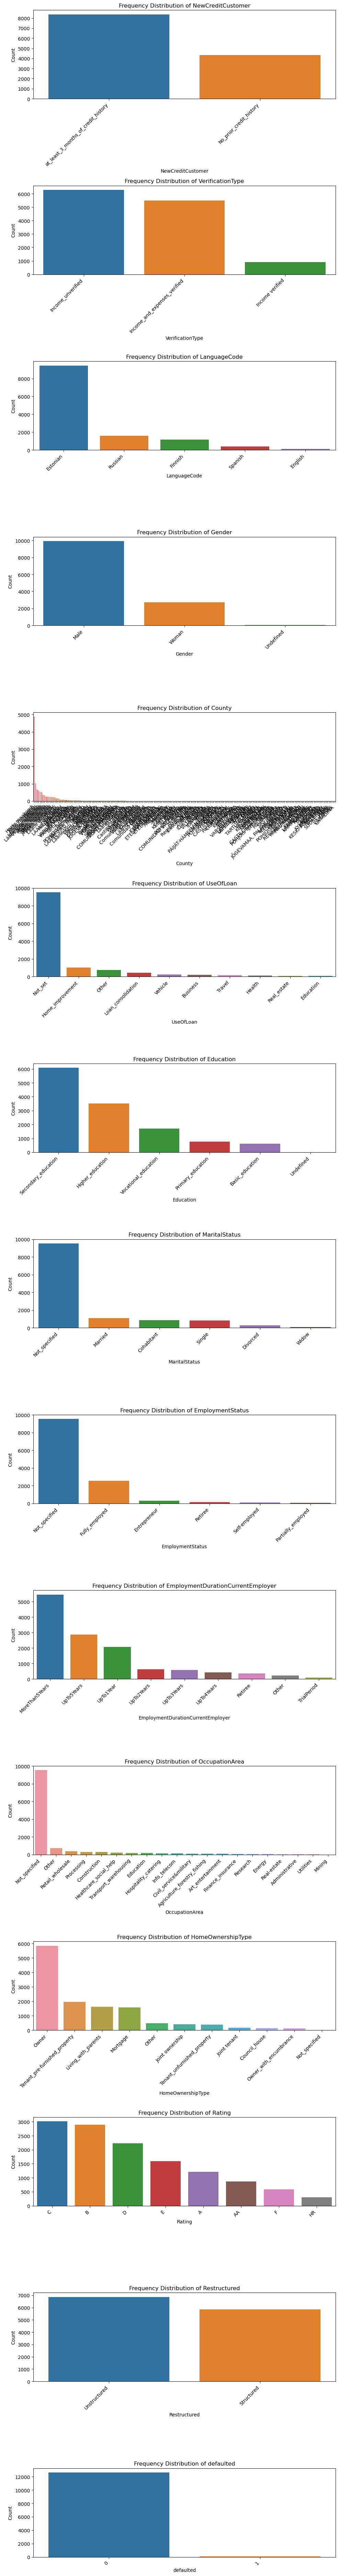

In [25]:
# Create bar plots for each categorical column
fig, axes = plt.subplots(nrows=len(Imp_categorical_columns), ncols=1, figsize=(10, 5 * len(Imp_categorical_columns)))

for ax, col in zip(axes, Imp_categorical_columns):
    sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index)
    ax.set_title(f"Frequency Distribution of {col}")
    ax.set_ylabel("Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

# Bivariate Data Analysis:

In [76]:
Numerical_Columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'PlannedPrincipalTillDate', 'RecoveryStage', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalWriteOffs',
       'InterestAndPenaltyWriteOffs', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsBefoleLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'PrincipalDebtServicingCost',
       'InterestAndPenaltyDebtServicingCost', 'defaulted'],
      dtype='object')

In [26]:
Numerical_pairs=[('Age', 'Amount'), 
    ('Interest', 'LoanDuration'),             
    ('MonthlyPayment', 'IncomeTotal'), 
    ('ExistingLiabilities', 'LiabilitiesTotal'), 
    ('RefinanceLiabilities', 'DebtToIncome'), 
    ('FreeCash', 'MonthlyPaymentDay'), 
    ('PlannedPrincipalTillDate', 'RecoveryStage'), 
    ('PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade'),        
    ('PrincipalBalance', 'InterestAndPenaltyBalance'), 
    ('NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan'), 
    ('PreviousRepaymentsBeforeLoan', 'PreviousEarlyRepaymentsBefoleLoan'), 
    ('PreviousEarlyRepaymentsCountBeforeLoan', 'defaulted')]
Numerical_pairs

[('Age', 'Amount'),
 ('Interest', 'LoanDuration'),
 ('MonthlyPayment', 'IncomeTotal'),
 ('ExistingLiabilities', 'LiabilitiesTotal'),
 ('RefinanceLiabilities', 'DebtToIncome'),
 ('FreeCash', 'MonthlyPaymentDay'),
 ('PlannedPrincipalTillDate', 'RecoveryStage'),
 ('PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade'),
 ('PrincipalBalance', 'InterestAndPenaltyBalance'),
 ('NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan'),
 ('PreviousRepaymentsBeforeLoan', 'PreviousEarlyRepaymentsBefoleLoan'),
 ('PreviousEarlyRepaymentsCountBeforeLoan', 'defaulted')]

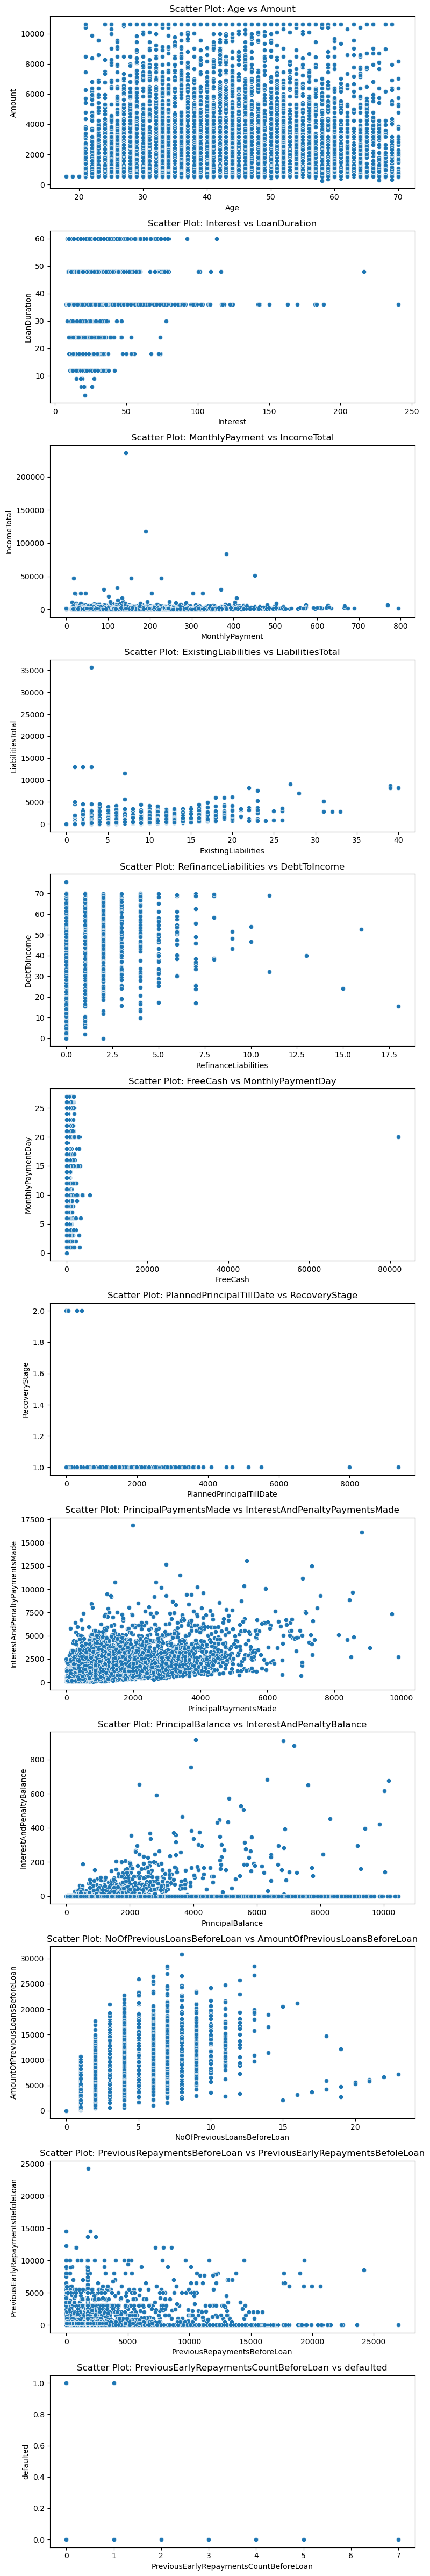

In [27]:
fig, axes = plt.subplots(nrows=len(Numerical_pairs), ncols=1, figsize=(8, 4 * len(Numerical_pairs)))

for ax, (x_col, y_col) in zip(axes, Numerical_pairs):
    sns.scatterplot(data=df, x=x_col, y=y_col, ax=ax)
    ax.set_title(f"Scatter Plot: {x_col} vs {y_col}")

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

In [28]:
df[Numeric_Features].corr()

Age    Amount  Interest  \
Age                                     1.000000  0.016374 -0.103322   
Amount                                  0.016374  1.000000  0.049176   
Interest                               -0.103322  0.049176  1.000000   
LoanDuration                           -0.076478  0.204036  0.010599   
MonthlyPayment                          0.010460  0.840313  0.218229   
IncomeTotal                             0.036903  0.081187  0.044536   
ExistingLiabilities                     0.030855 -0.135477 -0.263522   
LiabilitiesTotal                        0.052352  0.057248 -0.043845   
RefinanceLiabilities                    0.004445  0.171219  0.008837   
DebtToIncome                           -0.061741  0.225046 -0.034712   
FreeCash                               -0.009201  0.041257 -0.005639   
MonthlyPaymentDay                      -0.045523  0.012337 -0.084258   
PlannedPrincipalTillDate                0.020002  0.420030 -0.033976   
RecoveryStage                           0.017837  0.001048  0.040414   
PrincipalPaymentsMade                   0.031588  0.718677 -0.069889   
InterestAndPenaltyPaymentsMade         -0.047214  0.775704  0.337284   
PrincipalBalance                        0.001622  0.890632  0.112613   
InterestAndPenaltyBalance               0.001719  0.128082  0.135164   
NoOfPreviousLoansBeforeLoan             0.005937 -0.229945 -0.310418   
AmountOfPreviousLoansBeforeLoan         0.031883 -0.150251 -0.332554   
PreviousRepaymentsBeforeLoan            0.011264 -0.026804 -0.170553   
PreviousEarlyRepaymentsBefoleLoan      -0.005714  0.031473 -0.015485   
PreviousEarlyRepaymentsCountBeforeLoan -0.002014 -0.034104 -0.038164   
defaulted                               0.004579  0.031894  0.080089   

                                        LoanDuration  MonthlyPayment  \
Age                                        -0.076478        0.010460   
Amount                                      0.204036        0.840313   
Interest                                    0.010599        0.218229   
LoanDuration                                1.000000        0.055883   
MonthlyPayment                              0.055883        1.000000   
IncomeTotal                                -0.025581        0.107799   
ExistingLiabilities                        -0.066251       -0.195089   
LiabilitiesTotal                           -0.025109        0.052908   
RefinanceLiabilities                        0.095312        0.056828   
DebtToIncome                                0.149106        0.166963   
FreeCash                                    0.026098        0.039208   
MonthlyPaymentDay                           0.012747       -0.004067   
PlannedPrincipalTillDate                    0.100980        0.305542   
RecoveryStage                               0.001973        0.020576   
PrincipalPaymentsMade                       0.024556        0.587897   
InterestAndPenaltyPaymentsMade              0.221224        0.707806   
PrincipalBalance                            0.261555        0.758884   
InterestAndPenaltyBalance                   0.011785        0.170723   
NoOfPreviousLoansBeforeLoan                -0.105016       -0.259473   
AmountOfPreviousLoansBeforeLoan            -0.098209       -0.183263   
PreviousRepaymentsBeforeLoan               -0.034206       -0.033681   
PreviousEarlyRepaymentsBefoleLoan           0.048321        0.016090   
PreviousEarlyRepaymentsCountBeforeLoan      0.046890       -0.043521   
defaulted                                  -0.007091        0.040339   

                                        IncomeTotal  ExistingLiabilities  \
Age                                        0.036903             0.030855   
Amount                                     0.081187            -0.135477   
Interest                                   0.044536            -0.263522   
LoanDuration                              -0.025581            -0.066251   
MonthlyPayment                             0.107799            

In [29]:
Categorical_pairs =[('NewCreditCustomer', 'VerificationType'), 
       ('LanguageCode', 'Gender'),
       ('County', 'UseOfLoan'), ('Education', 'MaritalStatus'),
       ('EmploymentStatus', 'EmploymentDurationCurrentEmployer'),
       ('OccupationArea', 'HomeOwnershipType'), ('Rating', 'Restructured')]

### Investigate the relationship between numerical and categorical features

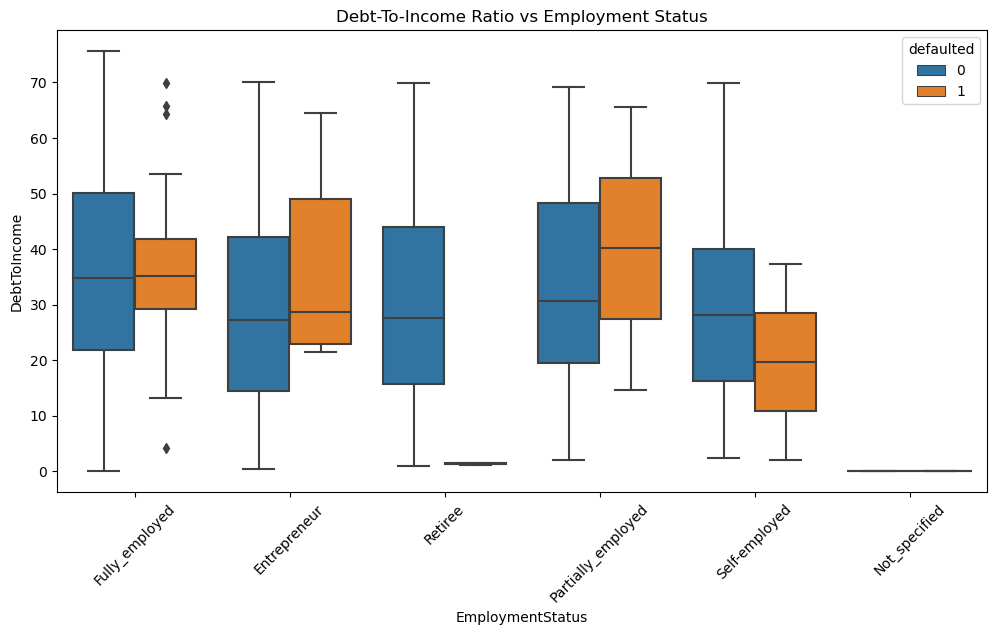

In [83]:
# Debt-To-Income Ratio vs Employment Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='EmploymentStatus', y='DebtToIncome', hue='defaulted')
plt.title("Debt-To-Income Ratio vs Employment Status")
plt.xticks(rotation=45)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17164\3309523980.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['defaulted'] == 1]['LoanDuration'], label='Defaulted', shade=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17164\3309523980.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['defaulted'] == 0]['LoanDuration'], label='Not defaulted', shade=True)


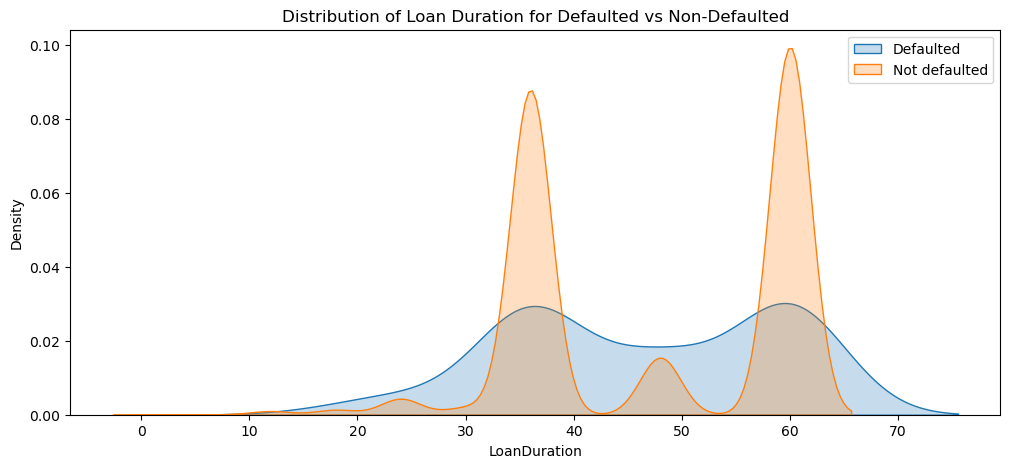

In [102]:
#KDE Plot-  Loan Duration for Defaulted vs Non-Defaulted
plt.figure(figsize=(12, 5))
sns.kdeplot(df[df['defaulted'] == 1]['LoanDuration'], label='Defaulted', shade=True)
sns.kdeplot(df[df['defaulted'] == 0]['LoanDuration'], label='Not defaulted', shade=True)
plt.title("Distribution of Loan Duration for Defaulted vs Non-Defaulted")
plt.legend()
plt.show()

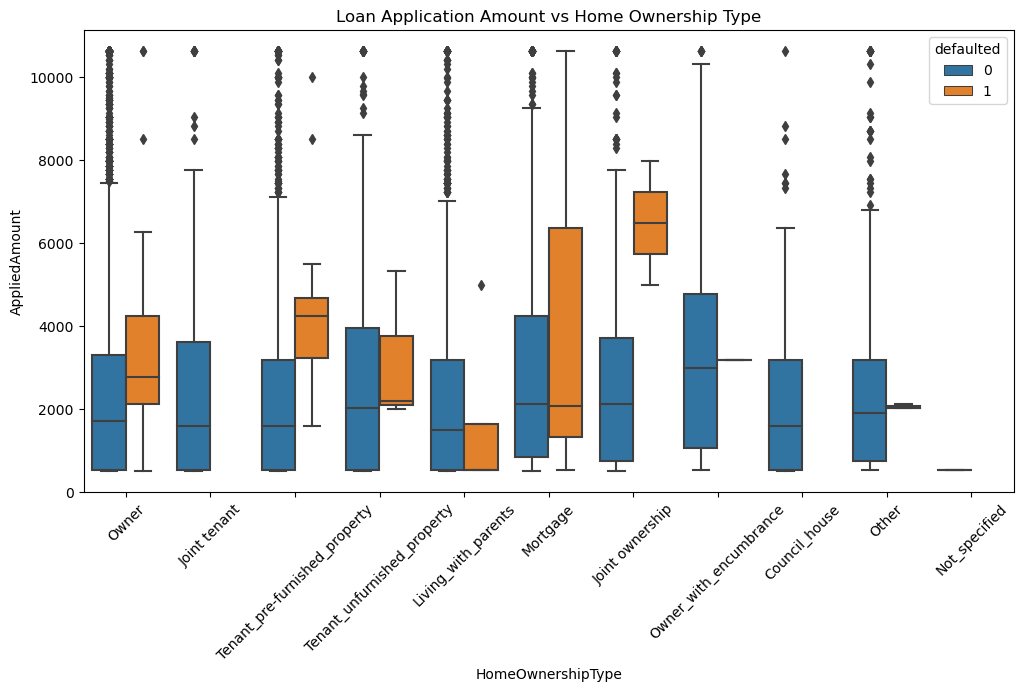

In [86]:
# Violin Plot - Loan Application Amount vs Home Ownership Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='HomeOwnershipType', y='AppliedAmount', hue='defaulted')
plt.title("Loan Application Amount vs Home Ownership Type")
plt.xticks(rotation=45)
plt.show()


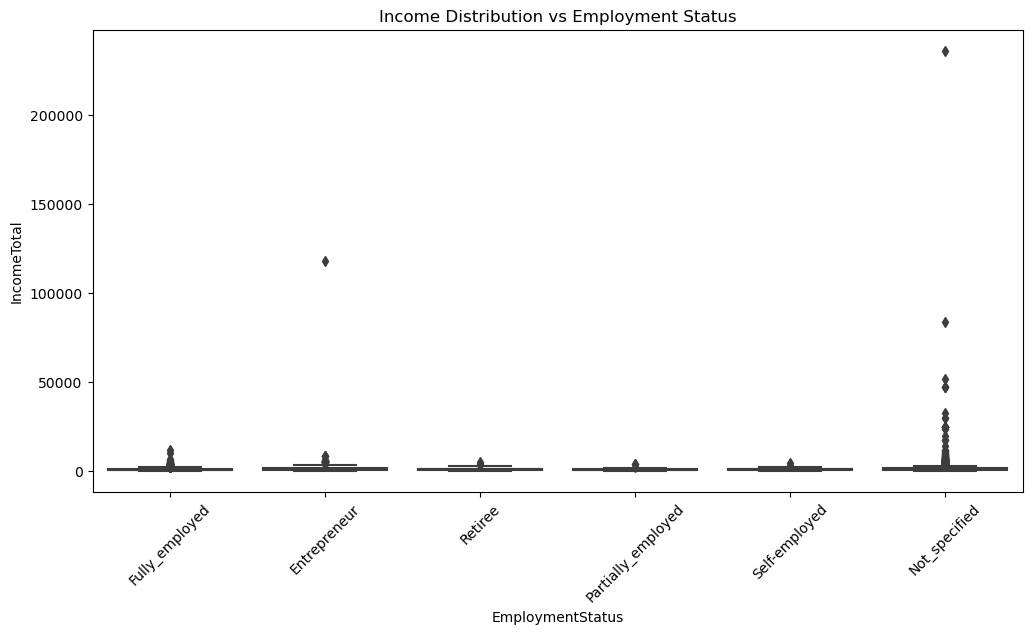

In [90]:
# Boxen Plot - Income Distribution by Employment Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='EmploymentStatus', y='IncomeTotal')
plt.title("Income Distribution vs Employment Status")
plt.xticks(rotation=45)
plt.show()

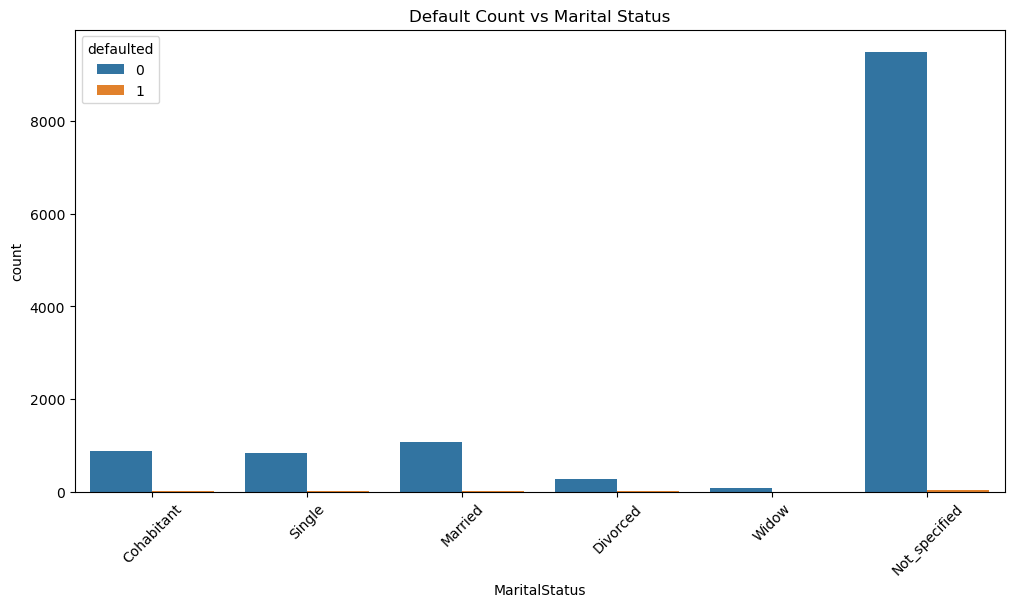

In [91]:
# Count Plot- Default Count by Marital Status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='MaritalStatus', hue='defaulted')
plt.title("Default Count vs Marital Status")
plt.xticks(rotation=45)
plt.show()

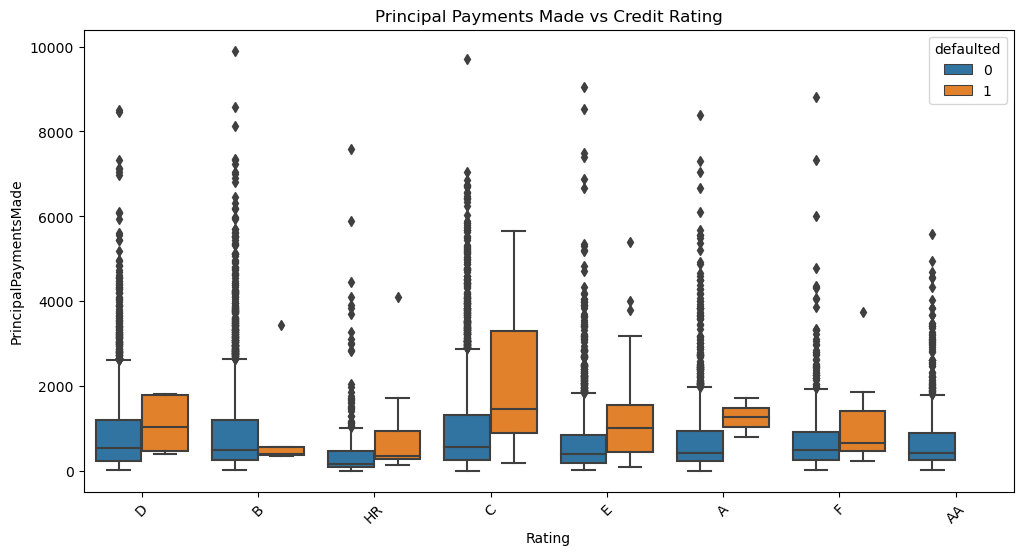

In [94]:
# Box Plot-  Principal Payments Made by Credit Rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Rating', y='PrincipalPaymentsMade', hue='defaulted')
plt.title("Principal Payments Made vs Credit Rating")
plt.xticks(rotation=45)
plt.show()

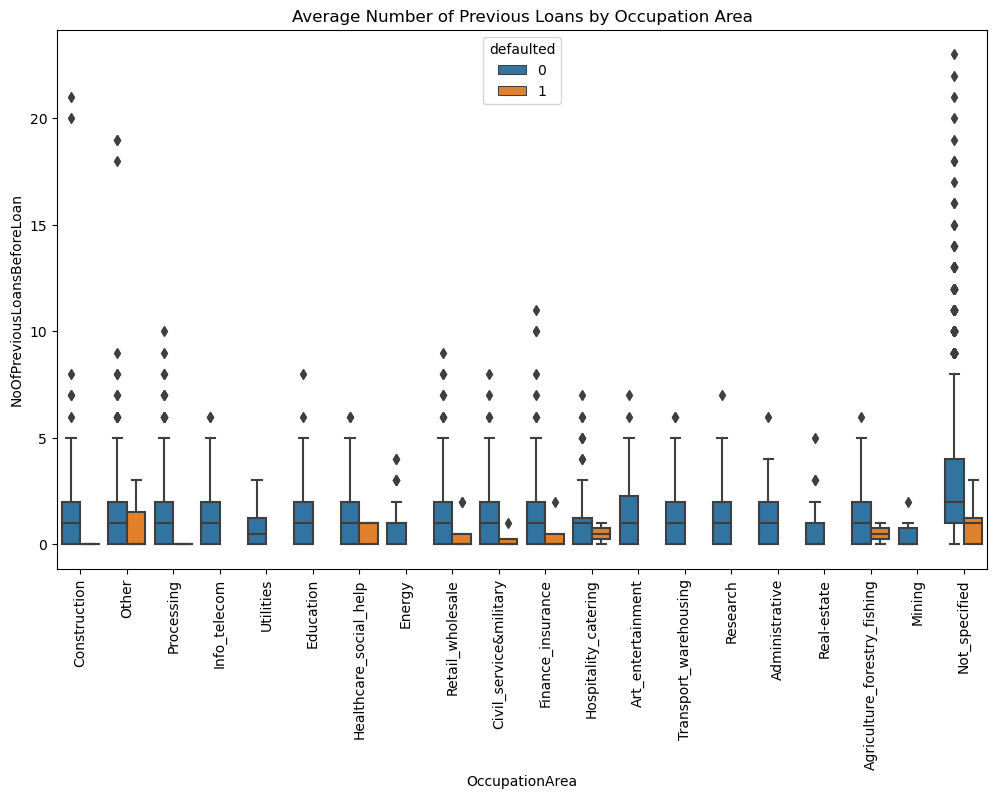

In [97]:
#Bar Plot- Average Number of Previous Loans by Occupation Area
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='OccupationArea', y='NoOfPreviousLoansBeforeLoan', hue='defaulted')
plt.title("Average Number of Previous Loans by Occupation Area")
plt.xticks(rotation=90)
plt.show()

# Multivariate Data Analysis

                                        BidsPortfolioManager   BidsApi  \
BidsPortfolioManager                                1.000000  0.187743   
BidsApi                                             0.187743  1.000000   
BidsManual                                          0.066831 -0.021308   
Age                                                -0.015199 -0.035804   
AppliedAmount                                       0.709846  0.154685   
Amount                                              0.742850  0.179621   
Interest                                           -0.050218 -0.029035   
LoanDuration                                        0.256025  0.028293   
MonthlyPayment                                      0.601723  0.138148   
IncomeTotal                                         0.041649 -0.005945   
ExistingLiabilities                                -0.022927  0.039178   
LiabilitiesTotal                                    0.150517  0.087929   
RefinanceLiabilities                  

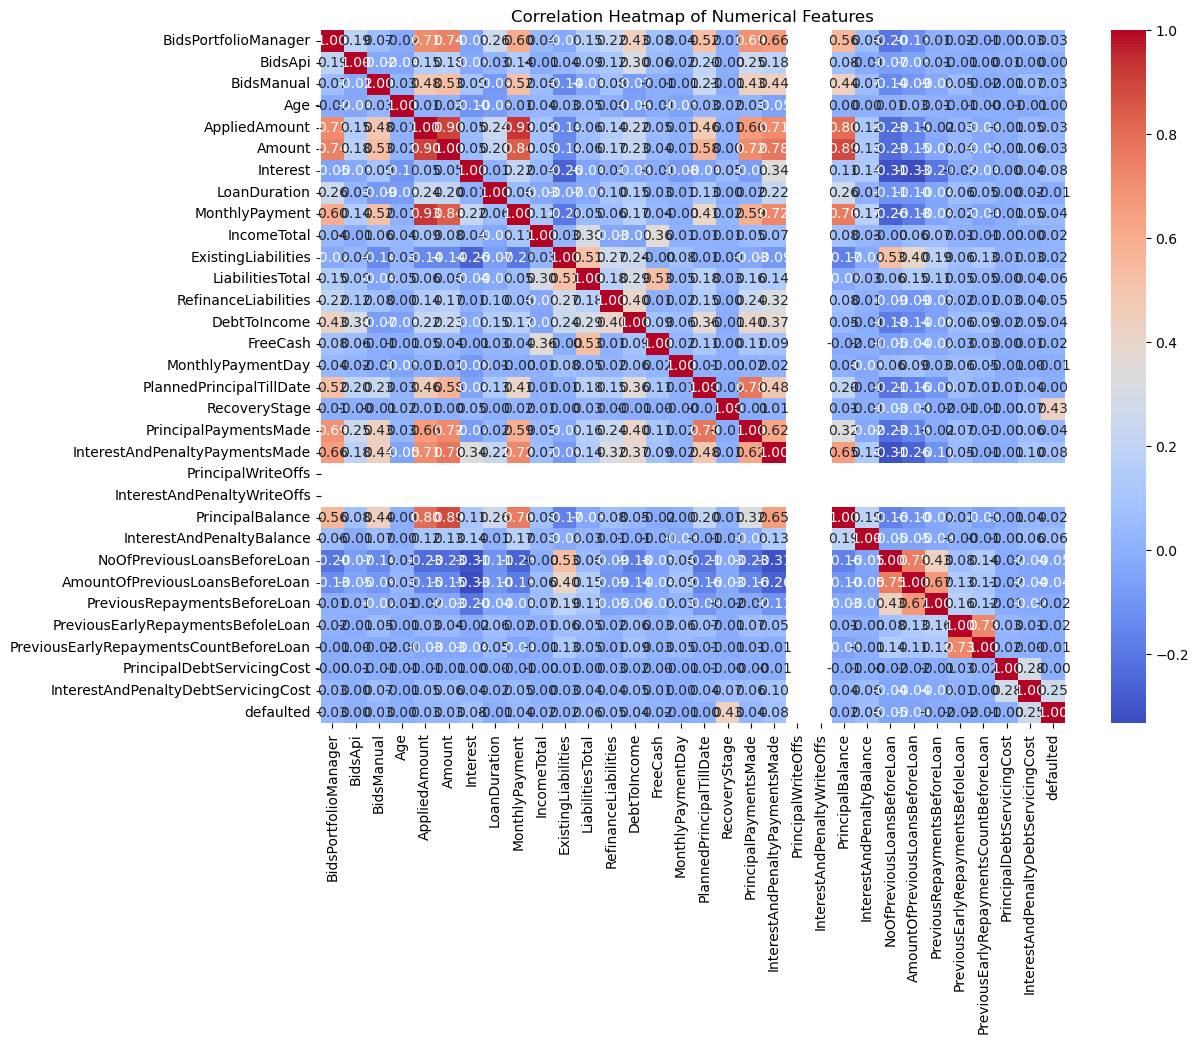

In [106]:
correlation_matrix = df[Numerical_Columns].corr()
print(correlation_matrix)
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# PCA (Principal Component Analysis) 

In [107]:
df_pca = df.select_dtypes(include=["number"]).dropna()

In [108]:
df_pca

BidsPortfolioManager  BidsApi  BidsManual  Age  AppliedAmount  Amount  \
0                      1355        0         645   28           2000    2000   
3                      2045        0         955   25           3000    3000   
4                      1500        0           0   30           1500    1500   
6                      1500        0           0   47           1500    1500   
9                      2330        0        7670   30          10000   10000   
...                     ...      ...         ...  ...            ...     ...   
11273                  5000        0           0   63           5000    5000   
11274                  1700        0           0   23           1700    1700   
11275                  2000        0           0   31           2000    2000   
11276                  3280        0        2220   37           5500    5500   
11277                  4835        0        2665   47           7500    7500   

       Interest  LoanDuration  MonthlyPayment  IncomeTotal  ...  \
0         24.46            60           63.90       2097.0  ...   
3         27.98            60          102.12       1530.0  ...   
4         29.25            60           52.84       1500.0  ...   
6         73.73            60           99.81       1206.0  ...   
9         23.57            60          318.52       1050.0  ...   
...         ...           ...             ...          ...  ...   
11273     28.00            60            0.00        832.0  ...   
11274     22.00            24            0.00        890.0  ...   
11275     28.00            36            0.00        924.0  ...   
11276     18.00            24            0.00       1417.0  ...   
11277     28.00            48            0.00       1583.0  ...   

       PrincipalBalance  InterestAndPenaltyBalance  \
0                612.43                        0.0   
3               1083.28                        0.0   
4                 46.89                        0.0   
6                526.92                        0.0   
9                279.94                        0.0   
...                 ...                        ...   
11273            870.11                        0.0   
11274            704.80                        0.0   
11275           1172.36                        0.0   
11276           1405.32                        0.0   
11277           2718.55                        0.0   

       NoOfPreviousLoansBeforeLoan  AmountOfPreviousLoansBeforeLoan  \
0                                0                              0.0   
3                                0                              0.0   
4                                0                              0.0   
6                                0                              0.0   
9                                0                              0.0   
...                            ...                              ...   
11273                            0                              0.0   
11274                            0                              0.0   
11275                            1                           1800.0   
11276                            0                              0.0   
11277                            0                              0.0   

       PreviousRepaymentsBeforeLoan  PreviousEarlyRepaymentsBefoleLoan  \
0                              0.00                                0.0   
3                              0.00                                0.0   
4                              0.00                                0.0   
6                              0.00                                0.0   
9                              0.00                                0.0   
...                             ...                                ...   
11273                          0.00                                0.0   
11274                          0.00                                0.0   
11275                         76.92                                0.0   

In [111]:
# Standardize the data 
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)
df_pca_scaled

array([[-0.19544931, -0.30498153,  0.10711396, ..., -0.02488679,
        -0.05743649, -0.10255632],
       [ 0.21093248, -0.30498153,  0.43960713, ..., -0.02488679,
        -0.05743649, -0.10255632],
       [-0.11005024, -0.30498153, -0.58468635, ..., -0.02488679,
        -0.05743649, -0.10255632],
       ...,
       [ 0.18442932, -0.30498153, -0.58468635, ..., -0.02488679,
        -0.05743649, -0.10255632],
       [ 0.938297  , -0.30498153,  1.79639377, ..., -0.02488679,
        -0.05743649,  9.75073962],
       [ 1.85412843, -0.30498153,  2.27368236, ..., -0.02488679,
        -0.05743649, -0.10255632]])

In [112]:
# Applying PCA
pca = PCA(n_components=10)  # Keep all components initially
principal_components = pca.fit_transform(df_pca_scaled)
principal_components

array([[ 0.10328397, -1.57469388,  0.6528208 , ..., -0.50418093,
         0.96256007,  0.2435489 ],
       [ 1.6618914 , -0.95626673,  0.93208422, ..., -0.48851366,
         0.69386476,  0.4435462 ],
       [-0.19738914, -1.52661911,  0.8532951 , ..., -0.65473394,
         0.84194503,  0.18377472],
       ...,
       [-0.19435619, -0.23162689,  1.54737263, ...,  0.46885329,
        -0.37968933,  0.66847452],
       [ 3.69661385, -0.90656723,  1.26805028, ..., -1.44858271,
        -2.64474418,  1.2970763 ],
       [ 5.82365951, -0.3899512 ,  0.01217516, ...,  0.46666663,
        -0.66186487, -0.27500706]])

In [115]:
# Explained variance ratio (how much each component contributes)
pca.explained_variance_ratio_


array([0.21708558, 0.09526459, 0.06979038, 0.05915176, 0.05426465,
       0.05131806, 0.04344041, 0.04026248, 0.03930033, 0.03508152])

In [116]:
np.sum(pca.explained_variance_ratio_)

0.7049597446664408

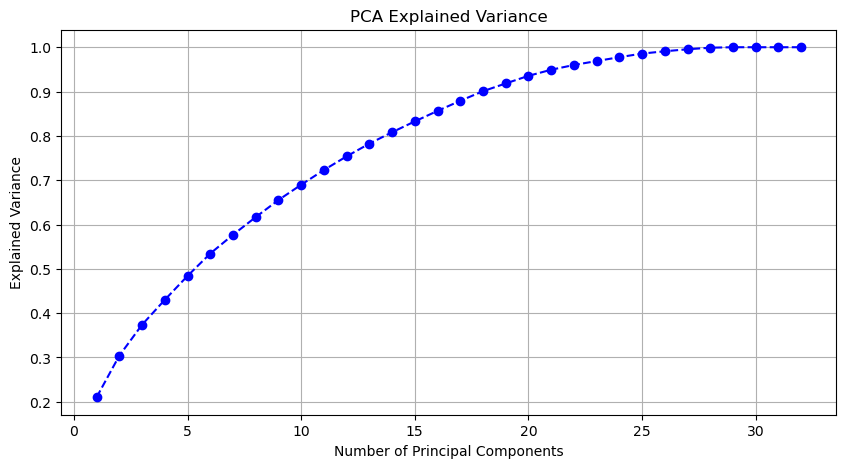

In [119]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

In [122]:
print(principal_components.shape)
principal_components

(4996, 10)


array([[ 0.10328397, -1.57469388,  0.6528208 , ..., -0.50418093,
         0.96256007,  0.2435489 ],
       [ 1.6618914 , -0.95626673,  0.93208422, ..., -0.48851366,
         0.69386476,  0.4435462 ],
       [-0.19738914, -1.52661911,  0.8532951 , ..., -0.65473394,
         0.84194503,  0.18377472],
       ...,
       [-0.19435619, -0.23162689,  1.54737263, ...,  0.46885329,
        -0.37968933,  0.66847452],
       [ 3.69661385, -0.90656723,  1.26805028, ..., -1.44858271,
        -2.64474418,  1.2970763 ],
       [ 5.82365951, -0.3899512 ,  0.01217516, ...,  0.46666663,
        -0.66186487, -0.27500706]])

In [123]:
#converting into df
columns = ['PC'+str(i+1) for i in range(10)]
principal_components = pd.DataFrame(data = principal_components, columns = columns)
principal_components.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   0.103284 -1.574694  0.652821  0.243264  0.570947 -0.728300 -0.314741   
1   1.661891 -0.956267  0.932084 -0.534237 -0.002410 -0.383672  0.181018   
2  -0.197389 -1.526619  0.853295 -0.327259  0.165307 -0.810177 -0.670939   
3   0.830062 -1.883195  1.586692 -0.611757  0.579595  0.196509  1.515975   
4  11.889687  0.548231 -0.616028 -0.905879  0.068078 -1.386327 -4.968664   

        PC8       PC9      PC10  
0 -0.504181  0.962560  0.243549  
1 -0.488514  0.693865  0.443546  
2 -0.654734  0.841945  0.183775  
3 -0.370505  0.166456  0.754256  
4  3.777822 -4.016797  2.434881

In [129]:
optimal_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1  # 95% variance
print(f"Optimal number of principal components: {optimal_components}")

Optimal number of principal components: 22


In [126]:
Categorical_Columns
print(df[Categorical_Columns].shape)
df[Categorical_Columns].head()

(12707, 16)


NewCreditCustomer              VerificationType  \
0              No_prior_credit_history               Income verified   
1  at_least_3_months_of_credit_history  Income_and_expenses_verified   
2  at_least_3_months_of_credit_history               Income verified   
3              No_prior_credit_history               Income verified   
4              No_prior_credit_history             Income_unverified   

  LanguageCode Gender Country         County         City           UseOfLoan  \
0      Finnish   Male      FI   POHJOIS-SAVO       KUOPIO               Other   
1     Estonian   Male      EE  LÄÄNE-VIRUMAA  SÕMERU VALD               Other   
2     Estonian   Male      EE       PÄRNUMAA        PÄRNU               Other   
3      Finnish   Male      FI   POHJOIS-SAVO       KUOPIO  Loan_consolidation   
4     Estonian   Male      EE          TARTU       KABINA               Other   

              Education MaritalStatus EmploymentStatus  \
0      Higher_education    Cohabitant   Fully_employed   
1   Secondary_education        Single   Fully_employed   
2       Basic_education        Single   Fully_employed   
3  Vocational_education        Single   Fully_employed   
4   Secondary_education    Cohabitant     Entrepreneur   

  EmploymentDurationCurrentEmployer OccupationArea  \
0                        UpTo2Years   Construction   
1                         UpTo1Year          Other   
2                        UpTo3Years     Processing   
3                        UpTo5Years   Info_telecom   
4                    MoreThan5Years      Utilities   

               HomeOwnershipType Rating  Restructured  
0                          Owner      D    Structured  
1                   Joint tenant      B    Structured  
2  Tenant_pre-furnished_property      B    Structured  
3    Tenant_unfurnished_property      D    Structured  
4  Tenant_pre-furnished_property      D  Unstructured

In [128]:
df_merge = pd.concat([principal_components, df[Categorical_Columns]], axis = 1)
print(df_merge.shape)
df_merge.head()

(12707, 26)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   0.103284 -1.574694  0.652821  0.243264  0.570947 -0.728300 -0.314741   
1   1.661891 -0.956267  0.932084 -0.534237 -0.002410 -0.383672  0.181018   
2  -0.197389 -1.526619  0.853295 -0.327259  0.165307 -0.810177 -0.670939   
3   0.830062 -1.883195  1.586692 -0.611757  0.579595  0.196509  1.515975   
4  11.889687  0.548231 -0.616028 -0.905879  0.068078 -1.386327 -4.968664   

        PC8       PC9      PC10  ...         City           UseOfLoan  \
0 -0.504181  0.962560  0.243549  ...       KUOPIO               Other   
1 -0.488514  0.693865  0.443546  ...  SÕMERU VALD               Other   
2 -0.654734  0.841945  0.183775  ...        PÄRNU               Other   
3 -0.370505  0.166456  0.754256  ...       KUOPIO  Loan_consolidation   
4  3.777822 -4.016797  2.434881  ...       KABINA               Other   

              Education MaritalStatus EmploymentStatus  \
0      Higher_education    Cohabitant   Fully_employed   
1   Secondary_education        Single   Fully_employed   
2       Basic_education        Single   Fully_employed   
3  Vocational_education        Single   Fully_employed   
4   Secondary_education    Cohabitant     Entrepreneur   

  EmploymentDurationCurrentEmployer OccupationArea  \
0                        UpTo2Years   Construction   
1                         UpTo1Year          Other   
2                        UpTo3Years     Processing   
3                        UpTo5Years   Info_telecom   
4                    MoreThan5Years      Utilities   

               HomeOwnershipType Rating  Restructured  
0                          Owner      D    Structured  
1                   Joint tenant      B    Structured  
2  Tenant_pre-furnished_property      B    Structured  
3    Tenant_unfurnished_property      D    Structured  
4  Tenant_pre-furnished_property      D  Unstructured  

[5 rows x 26 columns]

## Interactions between multiple features using 3D plots

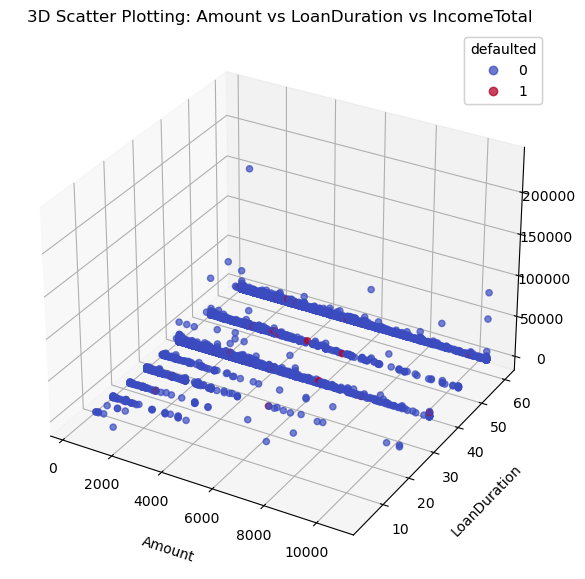

In [54]:
# Define numerical features for the 3D plot
top_features = ["Amount", "LoanDuration", "IncomeTotal"]

# Define categorical feature for color mapping
color_col = "defaulted" if "defaulted" in df.columns else None
colors = df[color_col].astype("category").cat.codes if color_col else "b"

# Create a 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot
scatter = ax.scatter(df[top_features[0]], df[top_features[1]], df[top_features[2]], 
                     c=colors, cmap="coolwarm", alpha=0.7)

# Set labels and title
ax.set_xlabel(top_features[0], labelpad=12)
ax.set_ylabel(top_features[1], labelpad=12)
ax.set_zlabel(top_features[2], labelpad=12)
ax.set_title(f"3D Scatter Plotting: {top_features[0]} vs {top_features[1]} vs {top_features[2]}") 

# Add legend if a categorical column is used for color
if color_col:
    legend1 = ax.legend(*scatter.legend_elements(), title=color_col)
    ax.add_artist(legend1)

# Show the plot
plt.show()
